# Traffic Prediction 

### Data Exploration and Analysis

In [57]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




In [58]:
# plt.rcParams['figure.figsize'] = [8.0, 8.0]
%config InlineBackend.figure_formats = ['retina']
plt.rcParams['figure.dpi'] = 140
plt.rcParams['savefig.dpi'] = 300

## Load Cleaned Data

In [59]:
pd_local_points = pd.read_csv('../data/pd_count_points_cleaned.csv')

In [60]:
pd_raw_count_cleaned = pd.read_csv('../data/pd_raw_count_cleaned.csv')

## Data Overview

In [61]:
pd_raw_count_cleaned.shape

(4960860, 34)

In [62]:
pd_local_points.shape

(6353, 8)

In [63]:
pd_local_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_id    6353 non-null   int64  
 1   local_authority_name  6353 non-null   object 
 2   local_authority_code  6353 non-null   object 
 3   year                  6353 non-null   int64  
 4   link_length_km        6353 non-null   float64
 5   link_length_miles     6353 non-null   float64
 6   cars_and_taxis        6353 non-null   float64
 7   all_motor_vehicles    6353 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 397.2+ KB


In [64]:
pd_raw_count_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960860 entries, 0 to 4960859
Data columns (total 34 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   count_point_id                int64  
 1   direction_of_travel           object 
 2   year                          int64  
 3   count_date                    object 
 4   hour                          int64  
 5   region_id                     int64  
 6   region_name                   object 
 7   region_ons_code               object 
 8   local_authority_id            int64  
 9   local_authority_name          object 
 10  local_authority_code          object 
 11  road_name                     object 
 12  road_category                 object 
 13  road_type                     object 
 14  easting                       int64  
 15  northing                      int64  
 16  latitude                      float64
 17  longitude                     float64
 18  pedal_cycles          

In [65]:
pd_local_points.describe()

local_authority_id         year  link_length_km  link_length_miles  \
count         6353.000000  6353.000000     6353.000000        6353.000000   
mean           104.059185  2008.036518     1916.349419        1190.764264   
std             59.983488     8.945957     2247.318181        1396.418797   
min              1.000000  1993.000000       34.180000          21.240000   
25%             52.000000  2000.000000      561.230000         348.730000   
50%            104.000000  2008.000000      974.300000         605.400000   
75%            156.000000  2016.000000     2024.890000        1258.210000   
max            214.000000  2023.000000    13134.170000        8161.190000   

       cars_and_taxis  all_motor_vehicles  
count    6.353000e+03        6.353000e+03  
mean     1.163215e+09        1.472735e+09  
std      1.294779e+09        1.646380e+09  
min      6.000000e+05        1.200000e+06  
25%      4.305000e+08        5.386000e+08  
50%      7.023000e+08        8.788000e+08  
75%      1.207200e+09        1.534400e+09  
max      7.811400e+09        9.849700e+09

In [66]:
pd_raw_count_cleaned.describe()

count_point_id          year          hour     region_id  \
count    4.960860e+06  4.960860e+06  4.960860e+06  4.960860e+06   
mean     5.224384e+05  2.011110e+03  1.249999e+01  6.145738e+00   
std      4.382066e+05  6.698138e+00  3.452073e+00  3.046860e+00   
min      5.100000e+01  2.000000e+03  0.000000e+00  1.000000e+00   
25%      4.645800e+04  2.006000e+03  9.000000e+00  4.000000e+00   
50%      8.053000e+05  2.010000e+03  1.200000e+01  7.000000e+00   
75%      9.444730e+05  2.017000e+03  1.500000e+01  9.000000e+00   
max      9.999990e+05  2.023000e+03  1.800000e+01  1.100000e+01   

       local_authority_id       easting      northing      latitude  \
count        4.960860e+06  4.960860e+06  4.960860e+06  4.960860e+06   
mean         1.024763e+02  4.324845e+05  3.030185e+05  5.261546e+01   
std          5.218679e+01  9.652454e+04  1.629898e+05  1.467131e+00   
min          1.000000e+00  7.040600e+04  1.021700e+04  4.991224e+01   
25%          6.700000e+01  3.678300e+05  1.785570e+05  5.149360e+01   
50%          9.700000e+01  4.327100e+05  2.768140e+05  5.238185e+01   
75%          1.410000e+02  5.104600e+05  3.970800e+05  5.346918e+01   
max          2.140000e+02  4.279600e+06  1.209448e+06  6.076301e+01   

          longitude  pedal_cycles  ...  HGVs_2_rigid_axle  HGVs_3_rigid_axle  \
count  4.960860e+06  4.960860e+06  ...       4.960856e+06       4.960859e+06   
mean  -1.538817e+00  2.865309e+00  ...       1.436799e+01       2.437656e+00   
std    1.408841e+00  1.405771e+01  ...       3.040551e+01       5.488801e+00   
min   -7.443134e+00  0.000000e+00  ...       0.000000e+00      -3.000000e+00   
25%   -2.482212e+00  0.000000e+00  ...       0.000000e+00       0.000000e+00   
50%   -1.511663e+00  0.000000e+00  ...       3.000000e+00       0.000000e+00   
75%   -3.910483e-01  2.000000e+00  ...       1.400000e+01       2.000000e+00   
max    1.754553e+00  2.396000e+03  ...       2.327000e+03       2.900000e+02   

       HGVs_4_or_more_rigid_axle  HGVs_3_or_4_articulated_axle  \
count               4.960858e+06                  4.960859e+06   
mean                2.841384e+00                  2.059839e+00   
std                 7.346510e+00                  6.536319e+00   
min                -2.000000e+00                  0.000000e+00   
25%                 0.000000e+00                  0.000000e+00   
50%                 0.000000e+00                  0.000000e+00   
75%                 2.000000e+00                  1.000000e+00   
max                 7.960000e+02                  9.270000e+02   

       HGVs_5_articulated_axle  HGVs_6_articulated_axle      all_HGVs  \
count             4.960860e+06             4.960859e+06  4.960851e+06   
mean              7.471719e+00             8.798888e+00  3.797751e+01   
std               2.682649e+01             3.268339e+01  9.515468e+01   
min              -2.000000e+00             0.000000e+00  0.000000e+00   
25%               0.000000e+00             0.000000e+00  1.000000e+00   
50%               0.000000e+00             0.000000e+00  5.000000e+00   
75%               2.000000e+00             2.000000e+00  2.700000e+01   
max               1.107000e+03             1.430000e+03  2.691000e+03   

       all_motor_vehicles         Month           Day  
count        4.960845e+06  4.960860e+06  4.960860e+06  
mean         5.472543e+02  6.582961e+00  1.553814e+01  
std          8.306453e+02  2.238836e+00  8.376723e+00  
min          0.000000e+00  3.000000e+00  1.000000e+00  
25%          5.200000e+01  5.000000e+00  9.000000e+00  
50%          2.390000e+02  6.000000e+00  1.600000e+01  
75%          6.640000e+02  9.000000e+00  2.300000e+01  
max          1.090500e+04  1.100000e+01  3.100000e+01  

[8 rows x 24 columns]

In [67]:
def format_number(num, p):
 
    return f"{num / 1_000_000:.1f} m".rstrip('0').rstrip('.')

In [68]:
import matplotlib.ticker as ticker

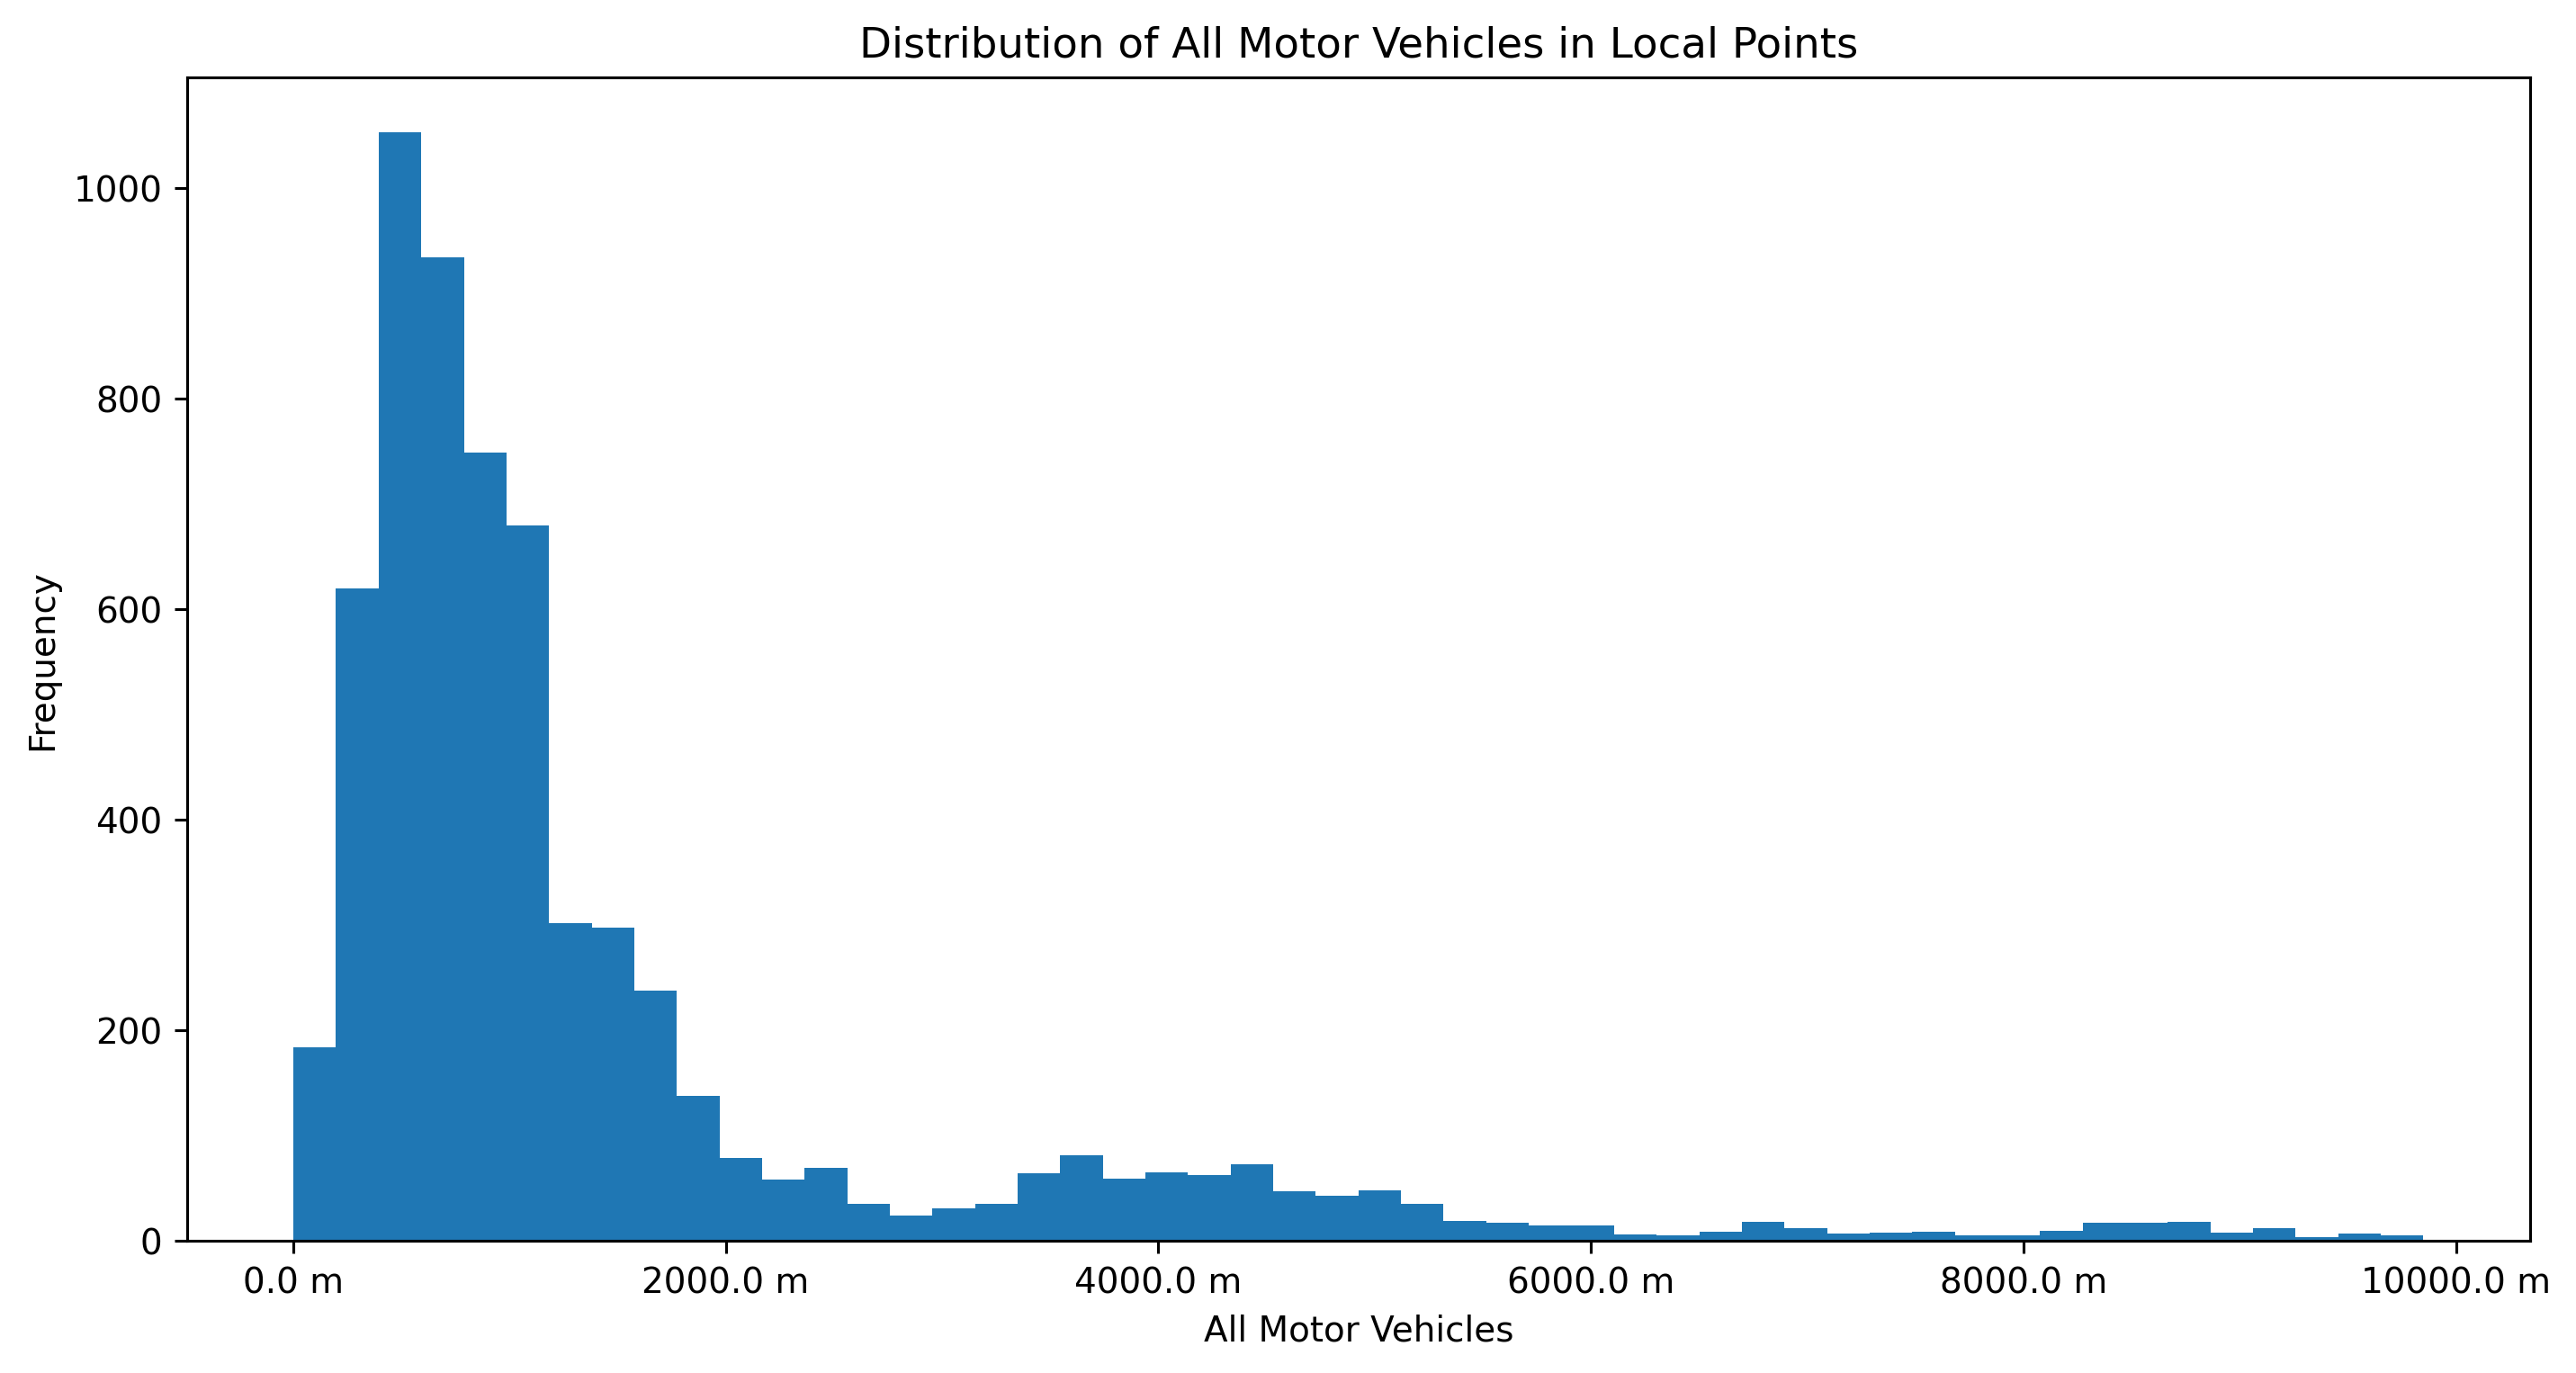

In [69]:
# Plotting  histogram
plt.figure(figsize=(12,6))
ax = pd_local_points['all_motor_vehicles'].hist(bins=50)

# Adding the title and labels
plt.title('Distribution of All Motor Vehicles in Local Points')
plt.xlabel('All Motor Vehicles')
plt.ylabel('Frequency')
# Correcting the ticker formatting without using lambda
formatter = ticker.FuncFormatter(format_number)
ax.get_xaxis().set_major_formatter(formatter)
plt.grid(False)
# Show plot
plt.show()


**Notes**

- The frequency decreases sharply as the vehicle count increases, meaning fewer local points have higher vehicle volumes
- TThe majority of data points fall below (2 billion), with a long tail extending towards the higher values.he 

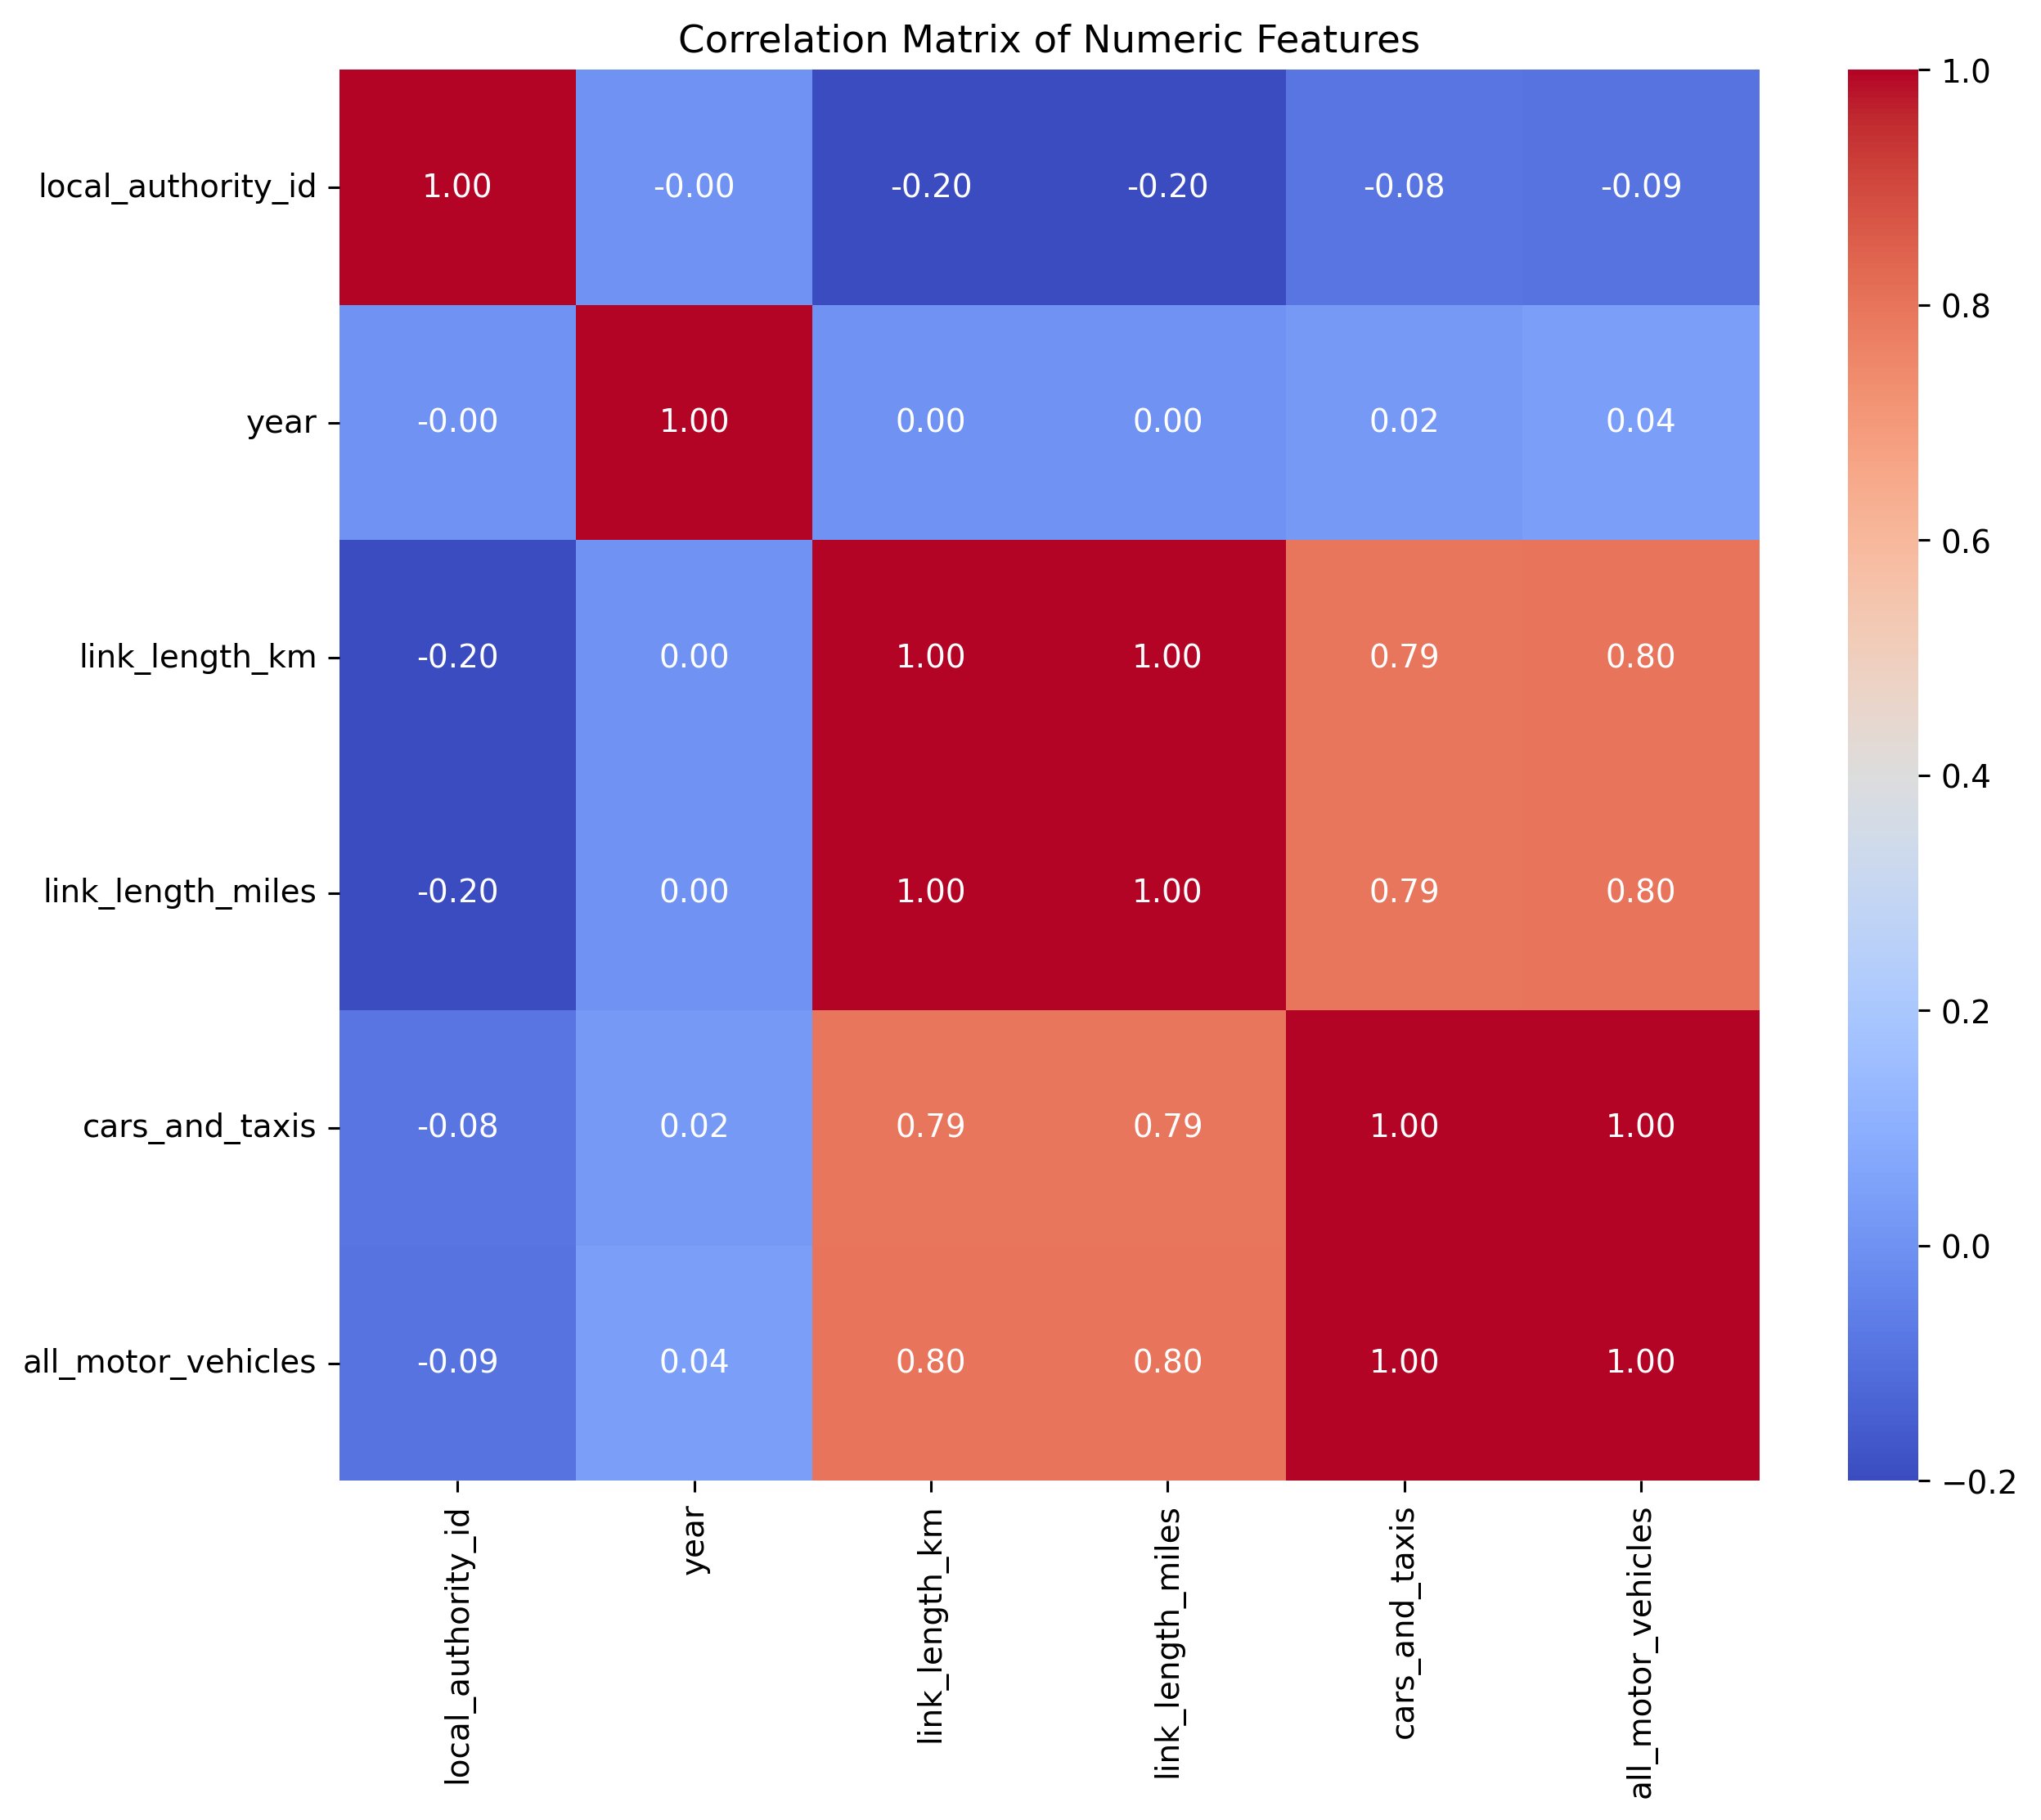

In [102]:
# Select only numeric columns
numeric_columns = pd_local_points.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Matrix of Numeric Features')

# Show the plot
plt.show()

**Observation**

- There is a strong relationships between the different measures of road length (km and miles) and traffic volume, 

## Traffic Distribution Analysis
### What affect the number of cars at a specific point?

- Let analyze the number of vehicles at specific points. The assumption we have is that the number of cars at a specfic point increases over time. 
- We will plot the distribution of hourly traffic count per day and week of vehicles at specific top points
- we will check the regions with highest volumnes of traffic



In [70]:
pd_raw_count_cleaned.head()

count_point_id direction_of_travel  year  count_date  hour  region_id  \
0              51                   N  2004  2004-05-21     7          1   
1              51                   N  2004  2004-05-21     8          1   
2              51                   N  2004  2004-05-21     9          1   
3              51                   N  2004  2004-05-21    10          1   
4              51                   N  2004  2004-05-21    11          1   

  region_name region_ons_code  local_authority_id local_authority_name  ...  \
0  South West       E12000009                   1      Isles of Scilly  ...   
1  South West       E12000009                   1      Isles of Scilly  ...   
2  South West       E12000009                   1      Isles of Scilly  ...   
3  South West       E12000009                   1      Isles of Scilly  ...   
4  South West       E12000009                   1      Isles of Scilly  ...   

  HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle HGVs_3_or_4_articulated_axle  \
0               0.0                       0.0                          0.0   
1               7.0                       0.0                          0.0   
2               0.0                       0.0                          0.0   
3               0.0                       0.0                          0.0   
4               0.0                       0.0                          0.0   

  HGVs_5_articulated_axle  HGVs_6_articulated_axle  all_HGVs  \
0                       0                      0.0       0.0   
1                       0                      0.0      14.0   
2                       0                      0.0       5.0   
3                       0                      0.0       4.0   
4                       0                      0.0       6.0   

   all_motor_vehicles  Month  Day_of_Week  Day  
0                19.0      5       Friday   21  
1                44.0      5       Friday   21  
2                45.0      5       Friday   21  
3                41.0      5       Friday   21  
4                41.0      5       Friday   21  

[5 rows x 34 columns]

In [71]:
pd_raw_count_cleaned['all_motor_vehicles']

0           19.0
1           44.0
2           45.0
3           41.0
4           41.0
           ...  
4960855    218.0
4960856    296.0
4960857    435.0
4960858    505.0
4960859    270.0
Name: all_motor_vehicles, Length: 4960860, dtype: float64

### Road Lenght and Traffic Volumne by Region

In [96]:
pd_local_points.columns

Index(['local_authority_id', 'local_authority_name', 'local_authority_code',
       'year', 'link_length_km', 'link_length_miles', 'cars_and_taxis',
       'all_motor_vehicles'],
      dtype='object')

In [97]:
pd_raw_count_cleaned.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'region_ons_code', 'local_authority_id',
       'local_authority_name', 'local_authority_code', 'road_name',
       'road_category', 'road_type', 'easting', 'northing', 'latitude',
       'longitude', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle',
       'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
       'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle',
       'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles', 'Month',
       'Day_of_Week', 'Day'],
      dtype='object')

In [100]:
# Merging the dataframes on 'local_authority_id' and 'year'
merged_data = pd.merge(pd_local_points, pd_raw_count_cleaned, on=['local_authority_id', 'year'], suffixes=('_points', '_raw'))


In [104]:
merged_data.columns

Index(['local_authority_id', 'local_authority_name_points',
       'local_authority_code_points', 'year', 'link_length_km',
       'link_length_miles', 'cars_and_taxis_points',
       'all_motor_vehicles_points', 'count_point_id', 'direction_of_travel',
       'count_date', 'hour', 'region_id', 'region_name', 'region_ons_code',
       'local_authority_name_raw', 'local_authority_code_raw', 'road_name',
       'road_category', 'road_type', 'easting', 'northing', 'latitude',
       'longitude', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis_raw', 'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle',
       'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
       'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle',
       'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles_raw',
       'Month', 'Day_of_Week', 'Day'],
      dtype='object')

In [105]:
# Grouping by latitude and longitude and calculating the mean traffic volume
geo_traffic = merged_data.groupby(['latitude', 'longitude', 'region_name']).agg({
    'all_motor_vehicles_raw': 'mean'
}).reset_index()

# Sorting by traffic volume to identify locations with the highest traffic
geo_traffic_sorted = geo_traffic.sort_values('all_motor_vehicles_raw', ascending=False)

# Display the first few rows of the result
print(geo_traffic_sorted.head())


        latitude  longitude region_name  all_motor_vehicles_raw
14252  51.479305  -0.503345      London             7110.333333
14253  51.479307  -0.503345      London             6492.575000
13378  51.458319  -0.518872  South East             6312.906250
44770  53.491605  -2.379780  North West             6301.756410
13377  51.458317  -0.518872  South East             6233.041667


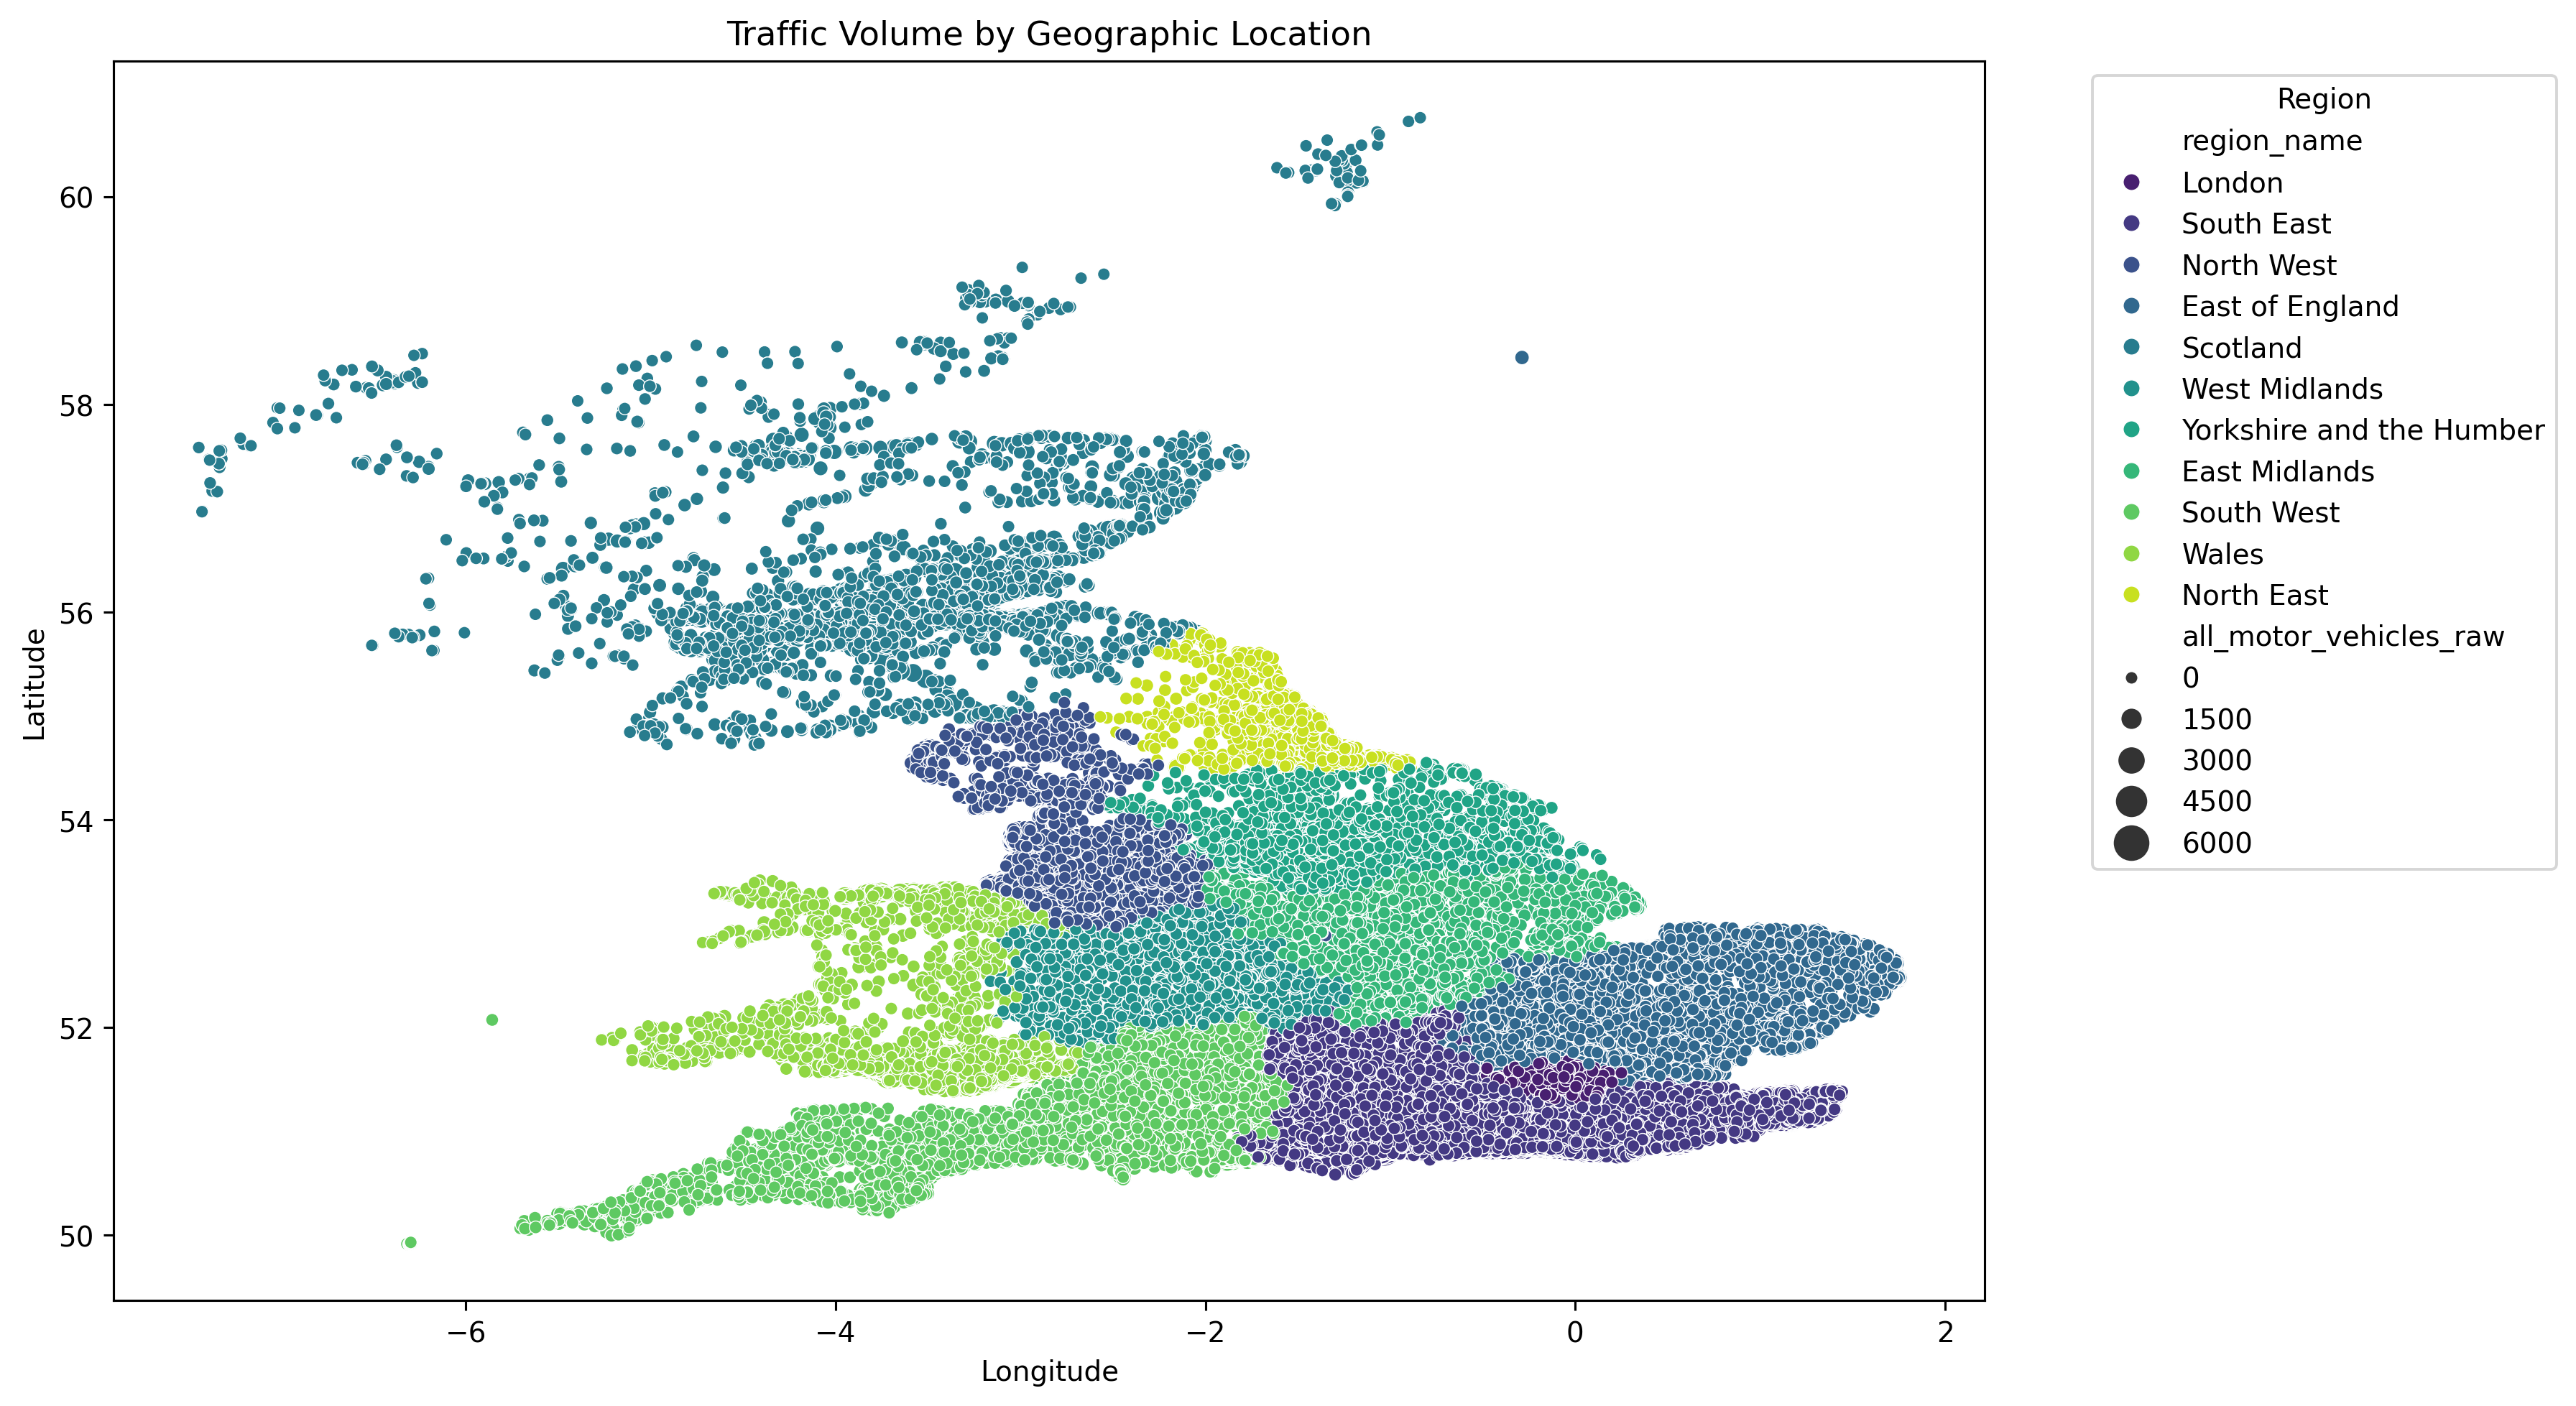

In [106]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', size='all_motor_vehicles_raw', data=geo_traffic_sorted, hue='region_name', palette='viridis', sizes=(20, 200))

plt.title('Traffic Volume by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Regional Analysis

**Assumptions**: 
- Certain regions have higher traffic
- Certain regions have higher motor vehicles

In [72]:

# Aggregate the traffic data by region
region_traffic = pd_raw_count_cleaned.groupby('region_name')['all_motor_vehicles'].sum().sort_values(ascending=False)

# Convert to a DataFrame
region_traffic_df = region_traffic.reset_index()


/var/folders/_z/nz5spzqj2rl11n5lc_k1cwwc0000gn/T/ipykernel_90133/811528438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='all_motor_vehicles', y='region_name', data=region_traffic_df, palette='viridis')


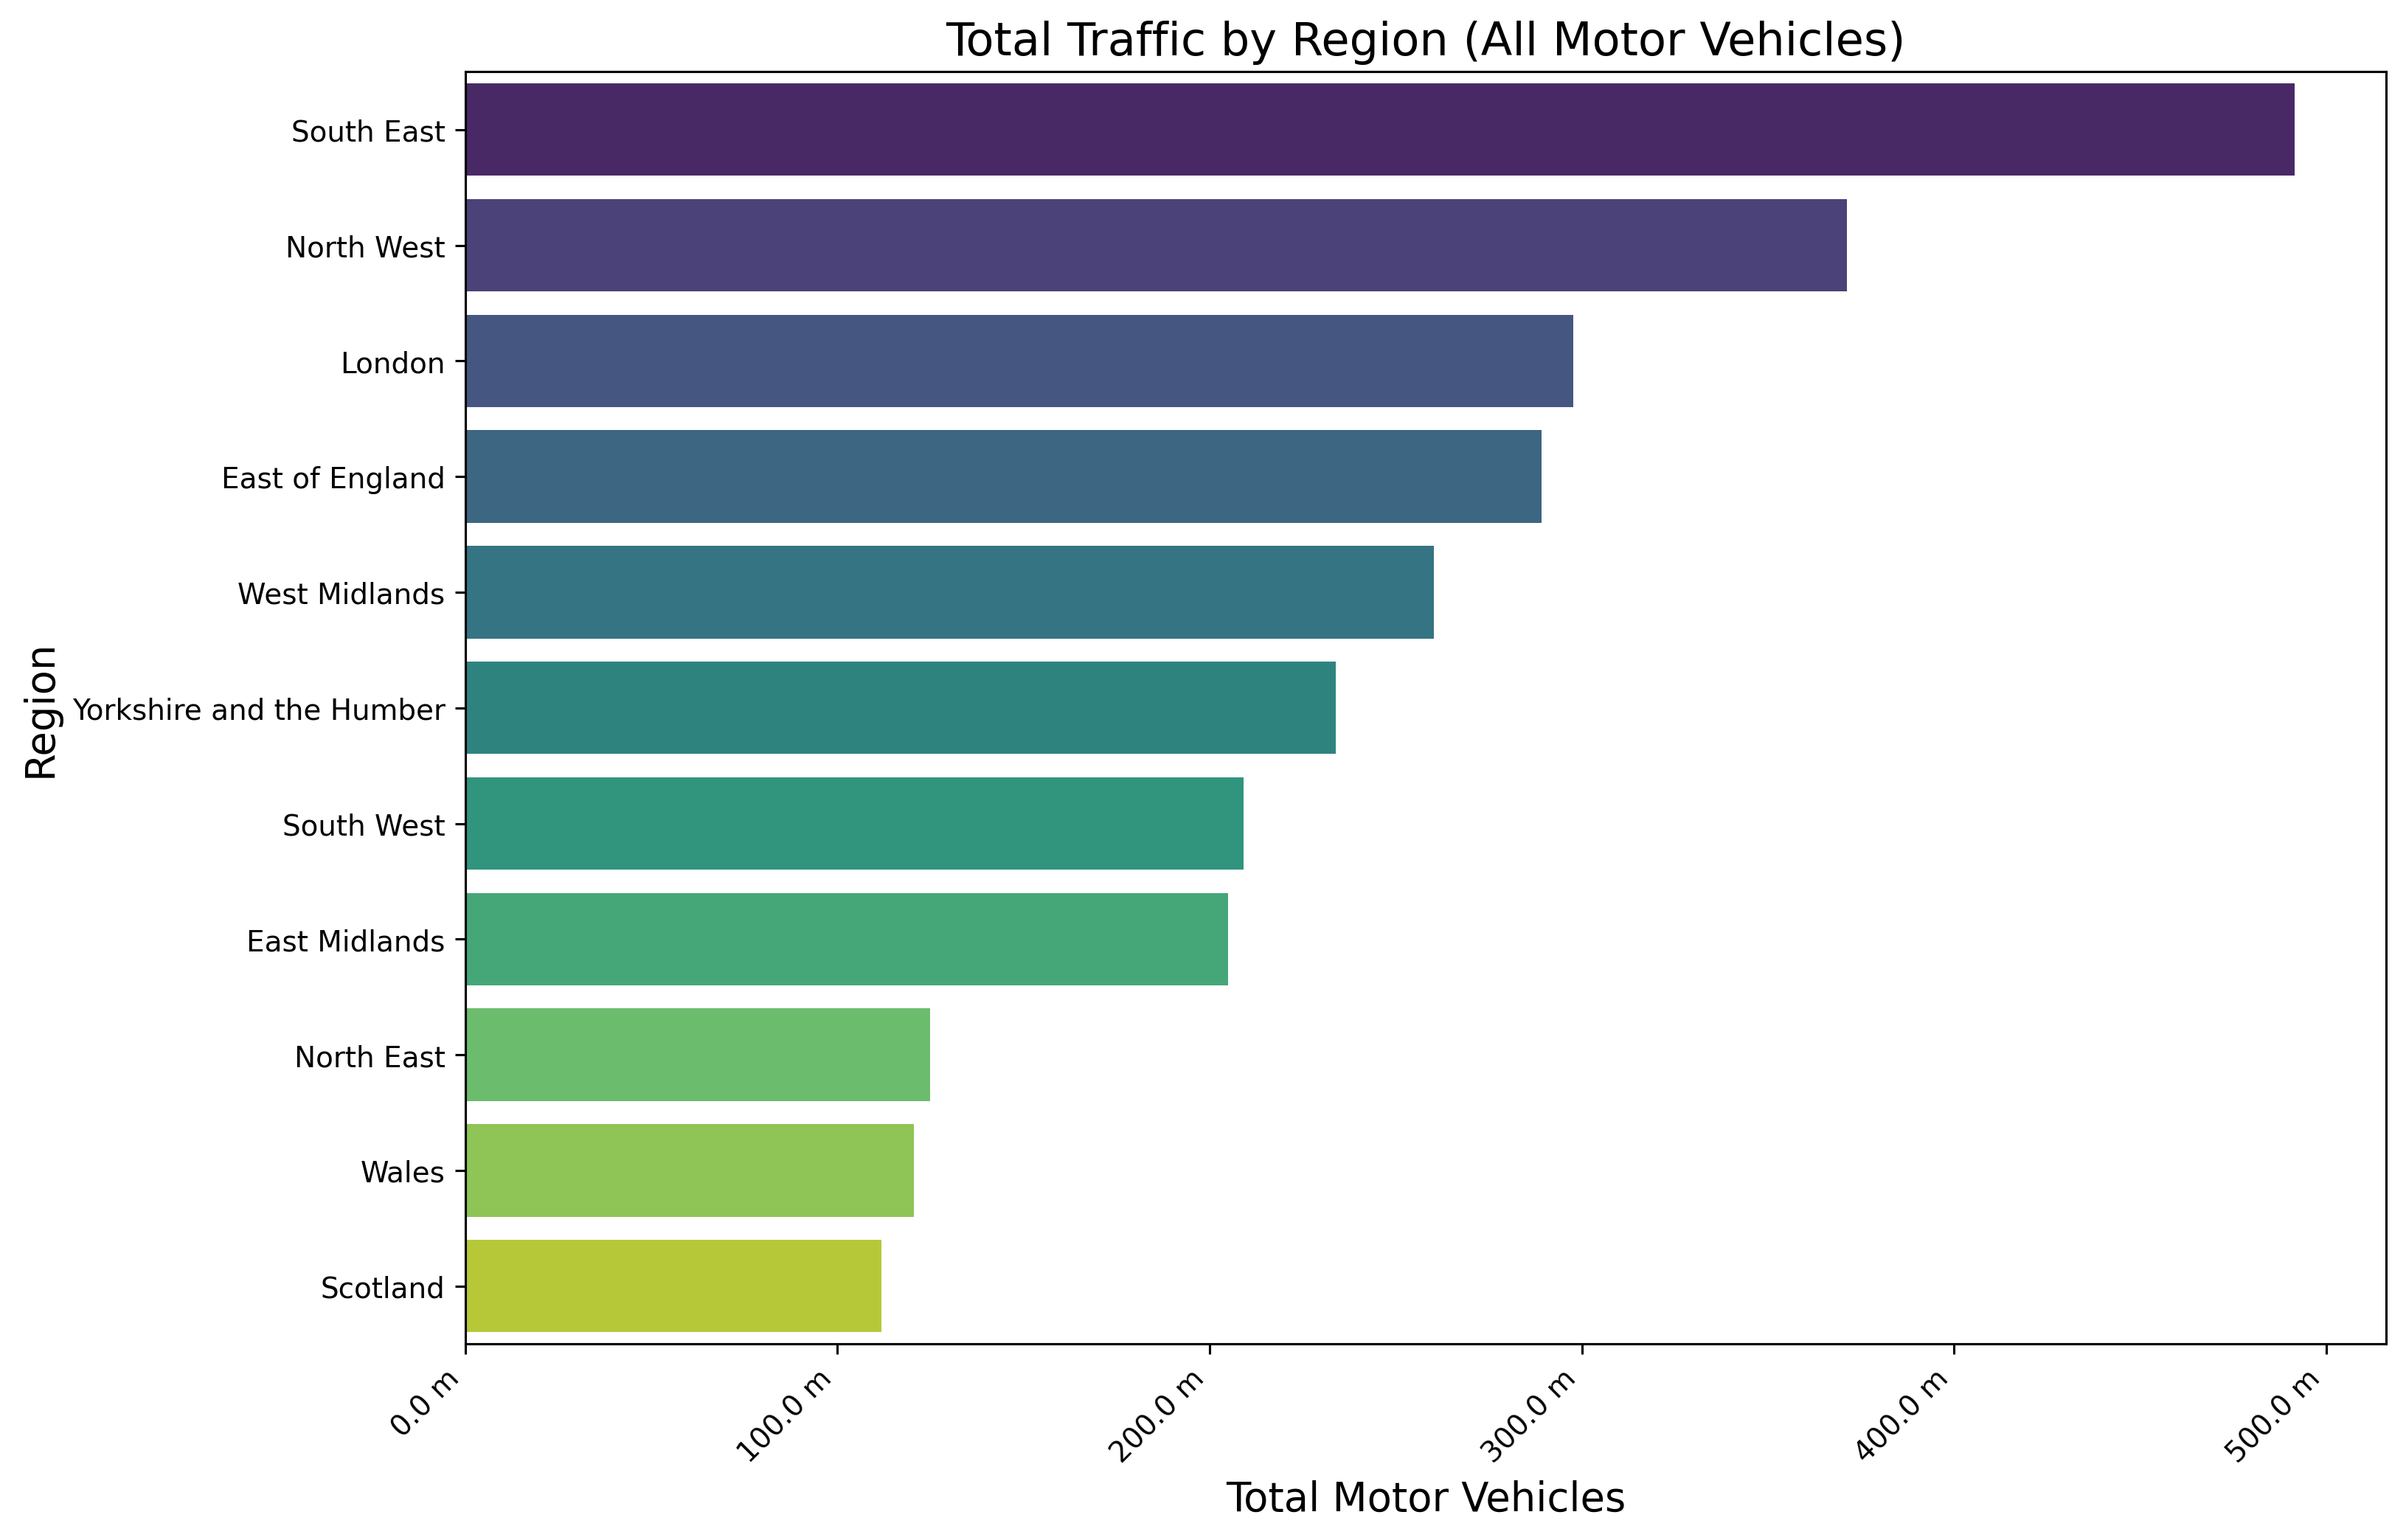

In [73]:

# Plot the data
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='all_motor_vehicles', y='region_name', data=region_traffic_df, palette='viridis')

# Add titles and labels
plt.title('Total Traffic by Region (All Motor Vehicles)', fontsize=16)
plt.xlabel('Total Motor Vehicles', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Improve readability
plt.xticks(rotation=45, ha='right')
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(format_number))
plt.show()


**Notes**
- The variation in total motor vehicle traffic across different regions, shows the South East, North West, and London being the top contributors
- The South East region has the highest total traffic volume, significantly more than any other region
- Scotland has the lowest total traffic volume among the listed regions. 

In [74]:
region_traffic_df.head()

region_name  all_motor_vehicles
0       South East         491442492.0
1       North West         371228712.0
2           London         297757688.0
3  East of England         289087476.0
4    West Midlands         260144964.0

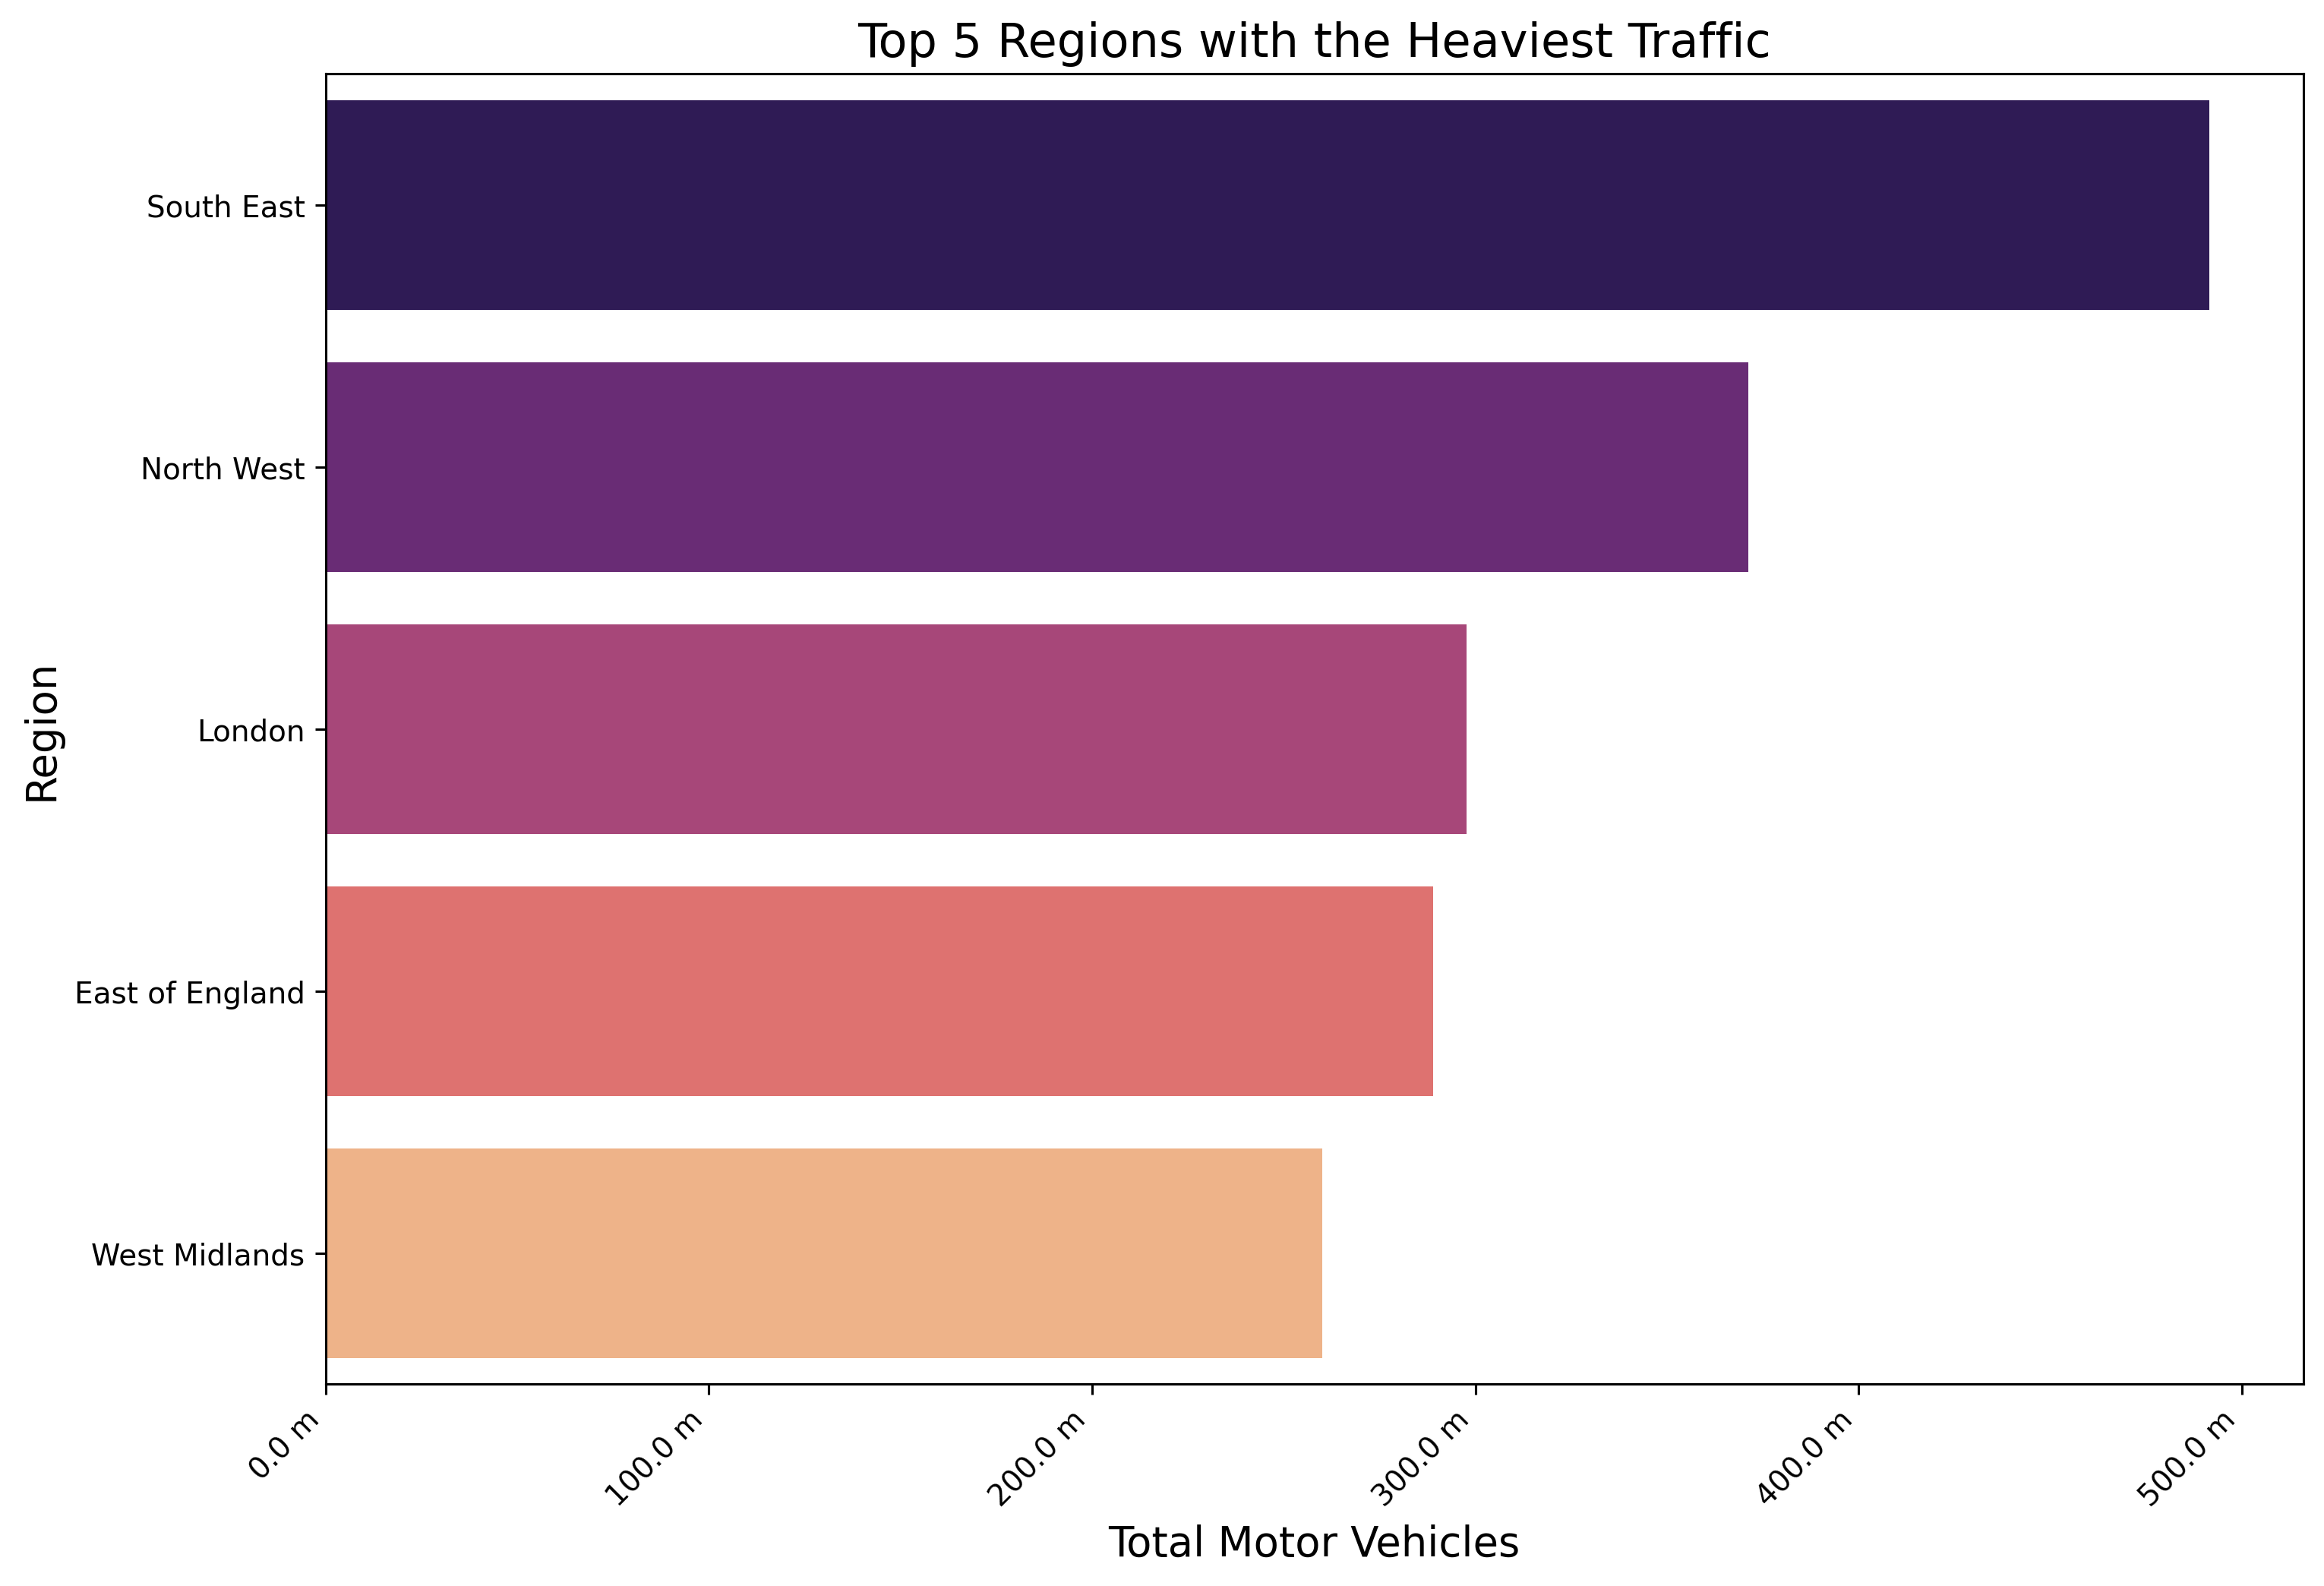

In [75]:
# Filter to top 5 regions
top_n = 5
top_regions = region_traffic_df.head(top_n)

# Plot the top regions
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='all_motor_vehicles', y='region_name', hue='region_name', data=top_regions, palette='magma')

# Add titles and labels
plt.title(f'Top {top_n} Regions with the Heaviest Traffic', fontsize=16)
plt.xlabel('Total Motor Vehicles', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Improve readability
plt.xticks(rotation=45, ha='right')
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(format_number))
plt.show()




### Time of Day & Week Analysis

    - What is the distribution of all motor vehicles by day of the week
    - what is the distribution of all motor vehicles by hour of the day
    
**Hypothesis** : 

- Traffic volume peaks during rush hours

In [76]:
pd_raw_count_cleaned.hour =  pd.to_datetime(pd_raw_count_cleaned.hour, unit='h', origin='2023-01-01').dt.strftime('%I %p')

In [77]:
hourly_average_traffic = pd_raw_count_cleaned.groupby(['region_name', "hour"]).aggregate({'all_motor_vehicles': 'mean'})

In [78]:
hourly_average_traffic = hourly_average_traffic.reset_index().sort_values(by=["hour"])

In [79]:
hourly_average_traffic

region_name   hour  all_motor_vehicles
97                      Wales  01 AM          138.250000
0               East Midlands  01 PM          468.946512
73                 South East  01 PM          540.353340
98                      Wales  01 PM          374.448973
61                   Scotland  01 PM          339.435079
..                        ...    ...                 ...
60                 North West  12 PM          559.919142
96                 South West  12 PM          385.983931
72                   Scotland  12 PM          330.242199
124             West Midlands  12 PM          478.389165
136  Yorkshire and the Humber  12 PM          487.346596

[137 rows x 3 columns]

In [80]:
hourly_average_top_regions = region_traffic_df.head(top_n).aggregate({'all_motor_vehicles': 'mean'})
 

In [81]:
hourly_average_top_regions

all_motor_vehicles    341932266.4
dtype: float64

In [82]:
top_regions.region_name.values

array(['South East', 'North West', 'London', 'East of England',
       'West Midlands'], dtype=object)

In [83]:
region_traffic_df.head(20)

region_name  all_motor_vehicles
0                 South East         491442492.0
1                 North West         371228712.0
2                     London         297757688.0
3            East of England         289087476.0
4              West Midlands         260144964.0
5   Yorkshire and the Humber         233950873.0
6                 South West         209013670.0
7              East Midlands         204973671.0
8                 North East         124980060.0
9                      Wales         120523844.0
10                  Scotland         111740512.0

In [88]:
# Define the correct order for the hour column
hour_order = ["12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", "07 AM", "08 AM", "09 AM", "10 AM", "11 AM",
              "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", "05 PM", "06 PM", "07 PM", "08 PM", "09 PM", "10 PM", "11 PM"]

# Convert the hour column to a categorical type with the specified order
hourly_average_traffic['hour'] = pd.Categorical(hourly_average_traffic['hour'], categories=hour_order, ordered=True)

# Sort by hour
hourly_average_traffic = hourly_average_traffic.sort_values('hour')


In [89]:
# Calculate the average traffic per region
region_avg_traffic = hourly_average_traffic.groupby('region_name')['all_motor_vehicles'].mean().sort_values(ascending=False)

# Select the top 3 regions with the highest average traffic
top_3_regions = region_avg_traffic.head(3).index

# Filter the original dataframe for only the top 3 regions
top_3_data = hourly_average_traffic[hourly_average_traffic['region_name'].isin(top_3_regions)]


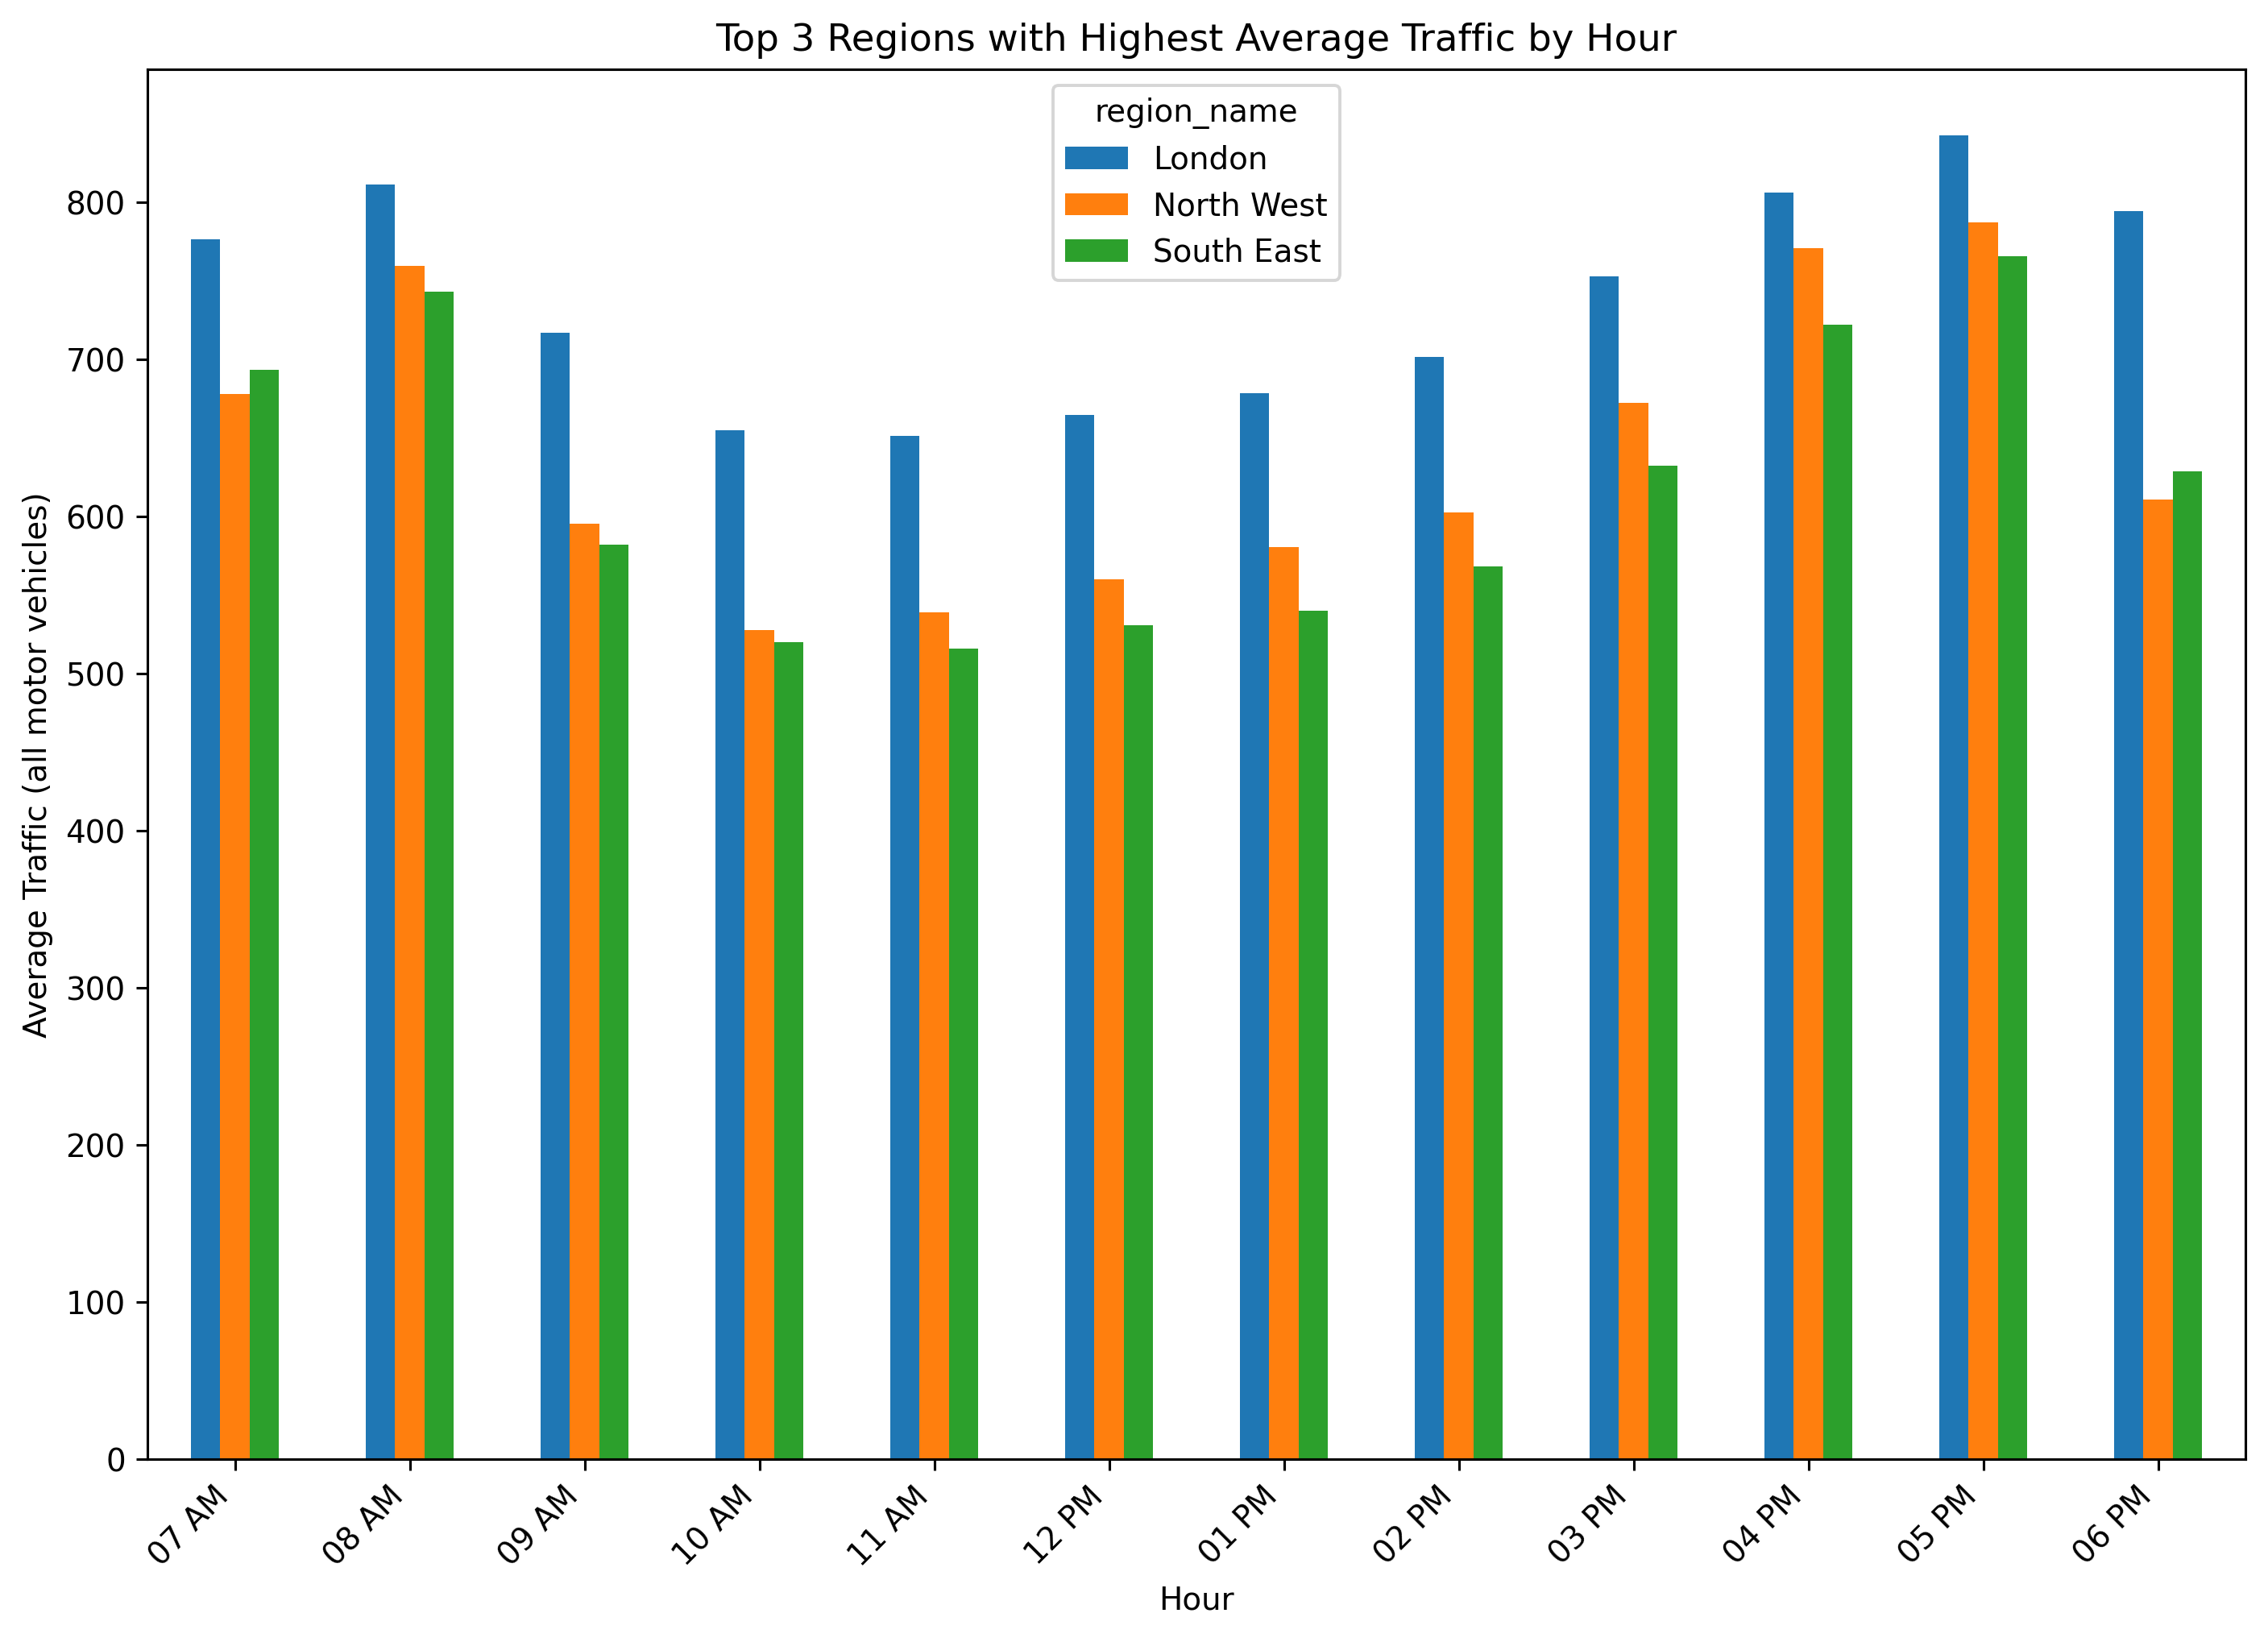

In [91]:
# Pivot top 3 regions by hour
top_3_pivot = top_3_data.pivot(index='hour', columns='region_name', values='all_motor_vehicles')

# Plot the data
top_3_pivot.plot(kind='bar', figsize=(12, 8), title="Top 3 Regions with Highest Average Traffic by Hour")

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Traffic (all motor vehicles)')
plt.xlabel('Hour')
plt.show()


**Observation**

- Peak Traffic Hours: The average traffic volumes are highest during morning and evening rush hours (peak-hour)
- 7 AM and 8 AM show the highest average traffic volumes across all three regions, indicating typical morning rush hours when most people commute to work or school.
- 5 PM and 6 PM also exhibit high traffic volumes, aligning with evening rush hours when people are returning home.
- Traffic volumes decrease slightly between 9 AM to 11 AM, and this could be due to the reduction in commuter traffic after the morning rush (assumptions)

**Regions Observation**

- London seems to consistently have the highest average traffic volume across almost all hours, despite having lower overall traffic counts compared to North west and South East. This reflects its status as a major metropolitan area with dense traffic throughout the day.
- North West and South East on the other hand, show similar patterns, but North West tends to have slightly higher traffic volumes compared to South East in the early morning and late afternoon hours.

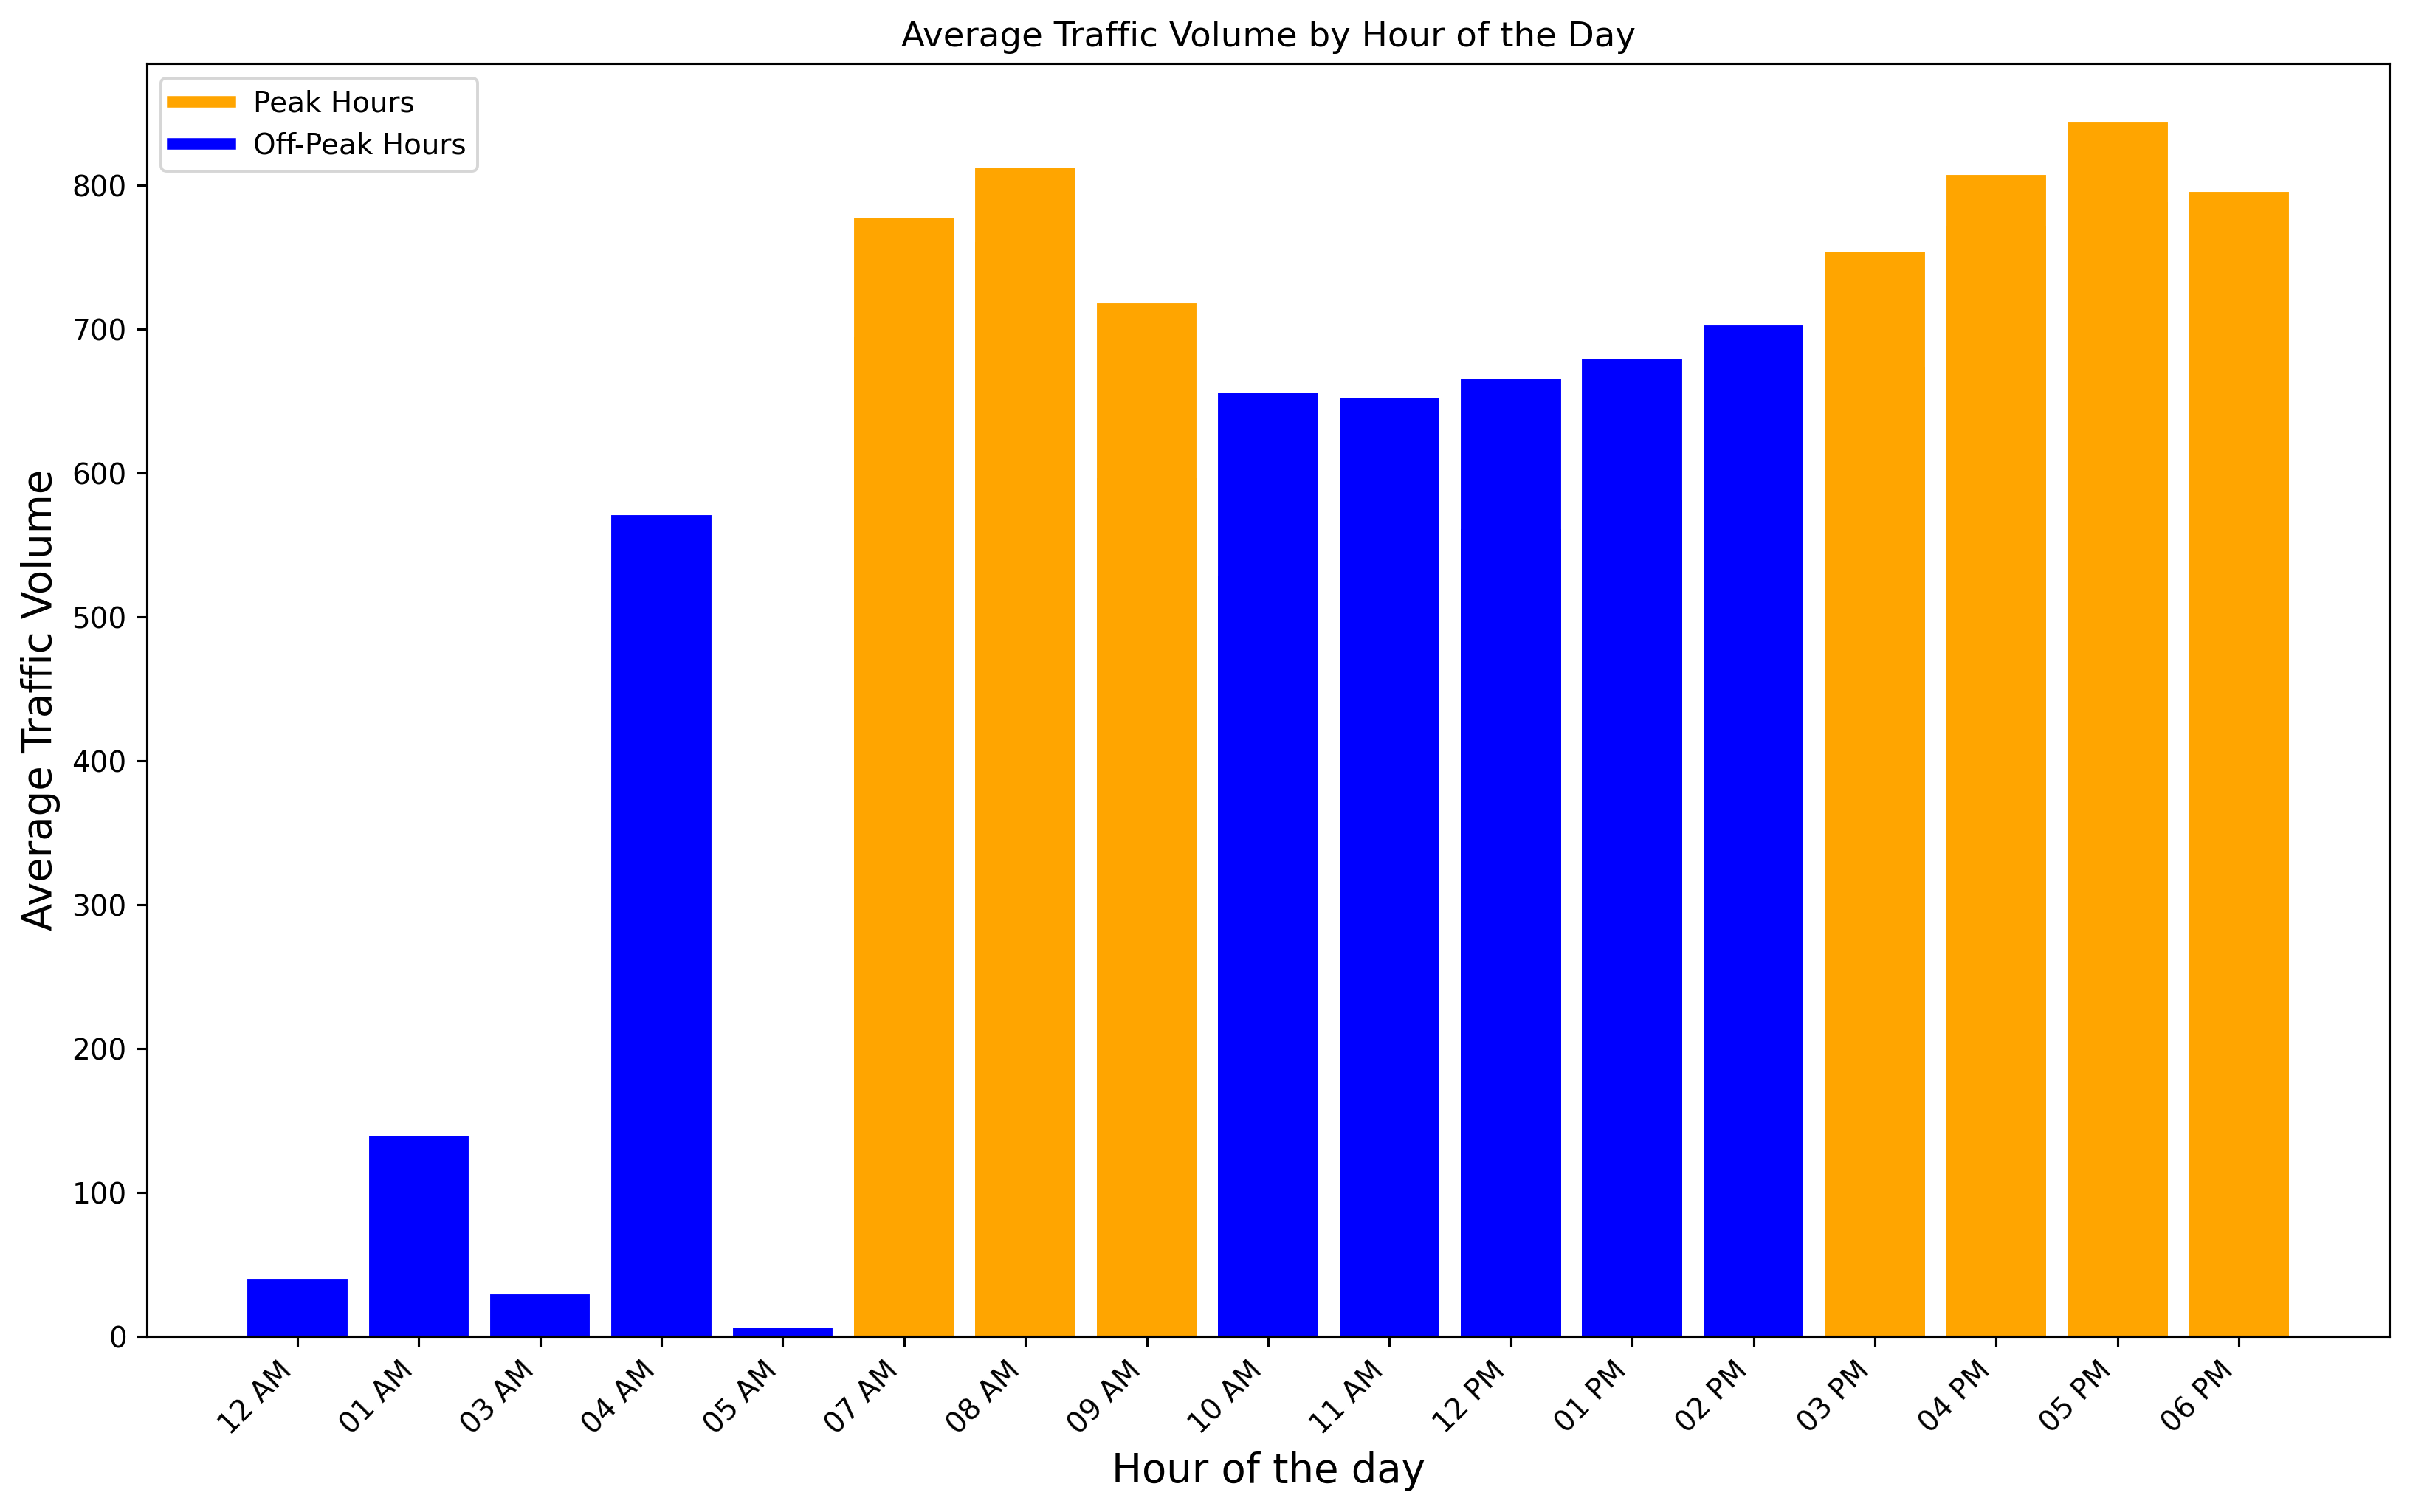

In [92]:
# generate a bar plot with matplotlib

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(hourly_average_traffic.hour, hourly_average_traffic.all_motor_vehicles, )
peak_hours = ["07 AM", "08 AM", "09 AM", "03 PM", "04 PM", "05 PM", "06 PM", "07 PM"]
# Assign colors to the bars based on whether they are in peak hours or not
for bar, hour in zip(bars, hourly_average_traffic.hour):
    if hour in peak_hours:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

# Create custom labels for the legend
custom_lines = [plt.Line2D([0], [0], color='orange', lw=4),
                plt.Line2D([0], [0], color='blue', lw=4)]
# Add the legend to the plot
ax.legend(custom_lines, ['Peak Hours', 'Off-Peak Hours'])
ax.set_ylabel('Average Traffic Volume', fontsize=14)
ax.set_xlabel('Hour of the day', fontsize=14)
ax.set_title('Average Traffic Volume by Hour of the Day')
plt.xticks(rotation=45, ha='right')
plt.show()

**Notes**

- Accross all regions, the peak hours are from 7AM to 9Am and evening peak between 4PM and 6PM. 
- These time periods represent the busiest times of the day, accross all regions
- The off-peak hours are from 10AM to 3PM and 12AM to 6AM. 

Traffic volume is significantly lower during these periods. 

In [ ]:
# Convert the 'count_date' column to datetime format to enable date-time operations 
pd_raw_count_cleaned['count_date'] = pd.to_datetime(pd_raw_count_cleaned['count_date'])

In [ ]:
pd_raw_count_cleaned['Month'] = pd_raw_count_cleaned['count_date'].dt.month
pd_raw_count_cleaned['Day_of_Week'] = pd_raw_count_cleaned['count_date'].dt.day_name()
pd_raw_count_cleaned['Day'] = pd_raw_count_cleaned['count_date'].dt.day

In [ ]:
daily_sum = pd_raw_count_cleaned.groupby('Day_of_Week').agg({'all_motor_vehicles': 'sum'}).reset_index()

In [ ]:
daily_sum

Day_of_Week  all_motor_vehicles
0      Friday         585583878.0
1      Monday         499539569.0
2    Saturday               640.0
3      Sunday             86128.0
4    Thursday         544675287.0
5     Tuesday         531619027.0
6   Wednesday         553339433.0

In [53]:
import matplotlib as mpl

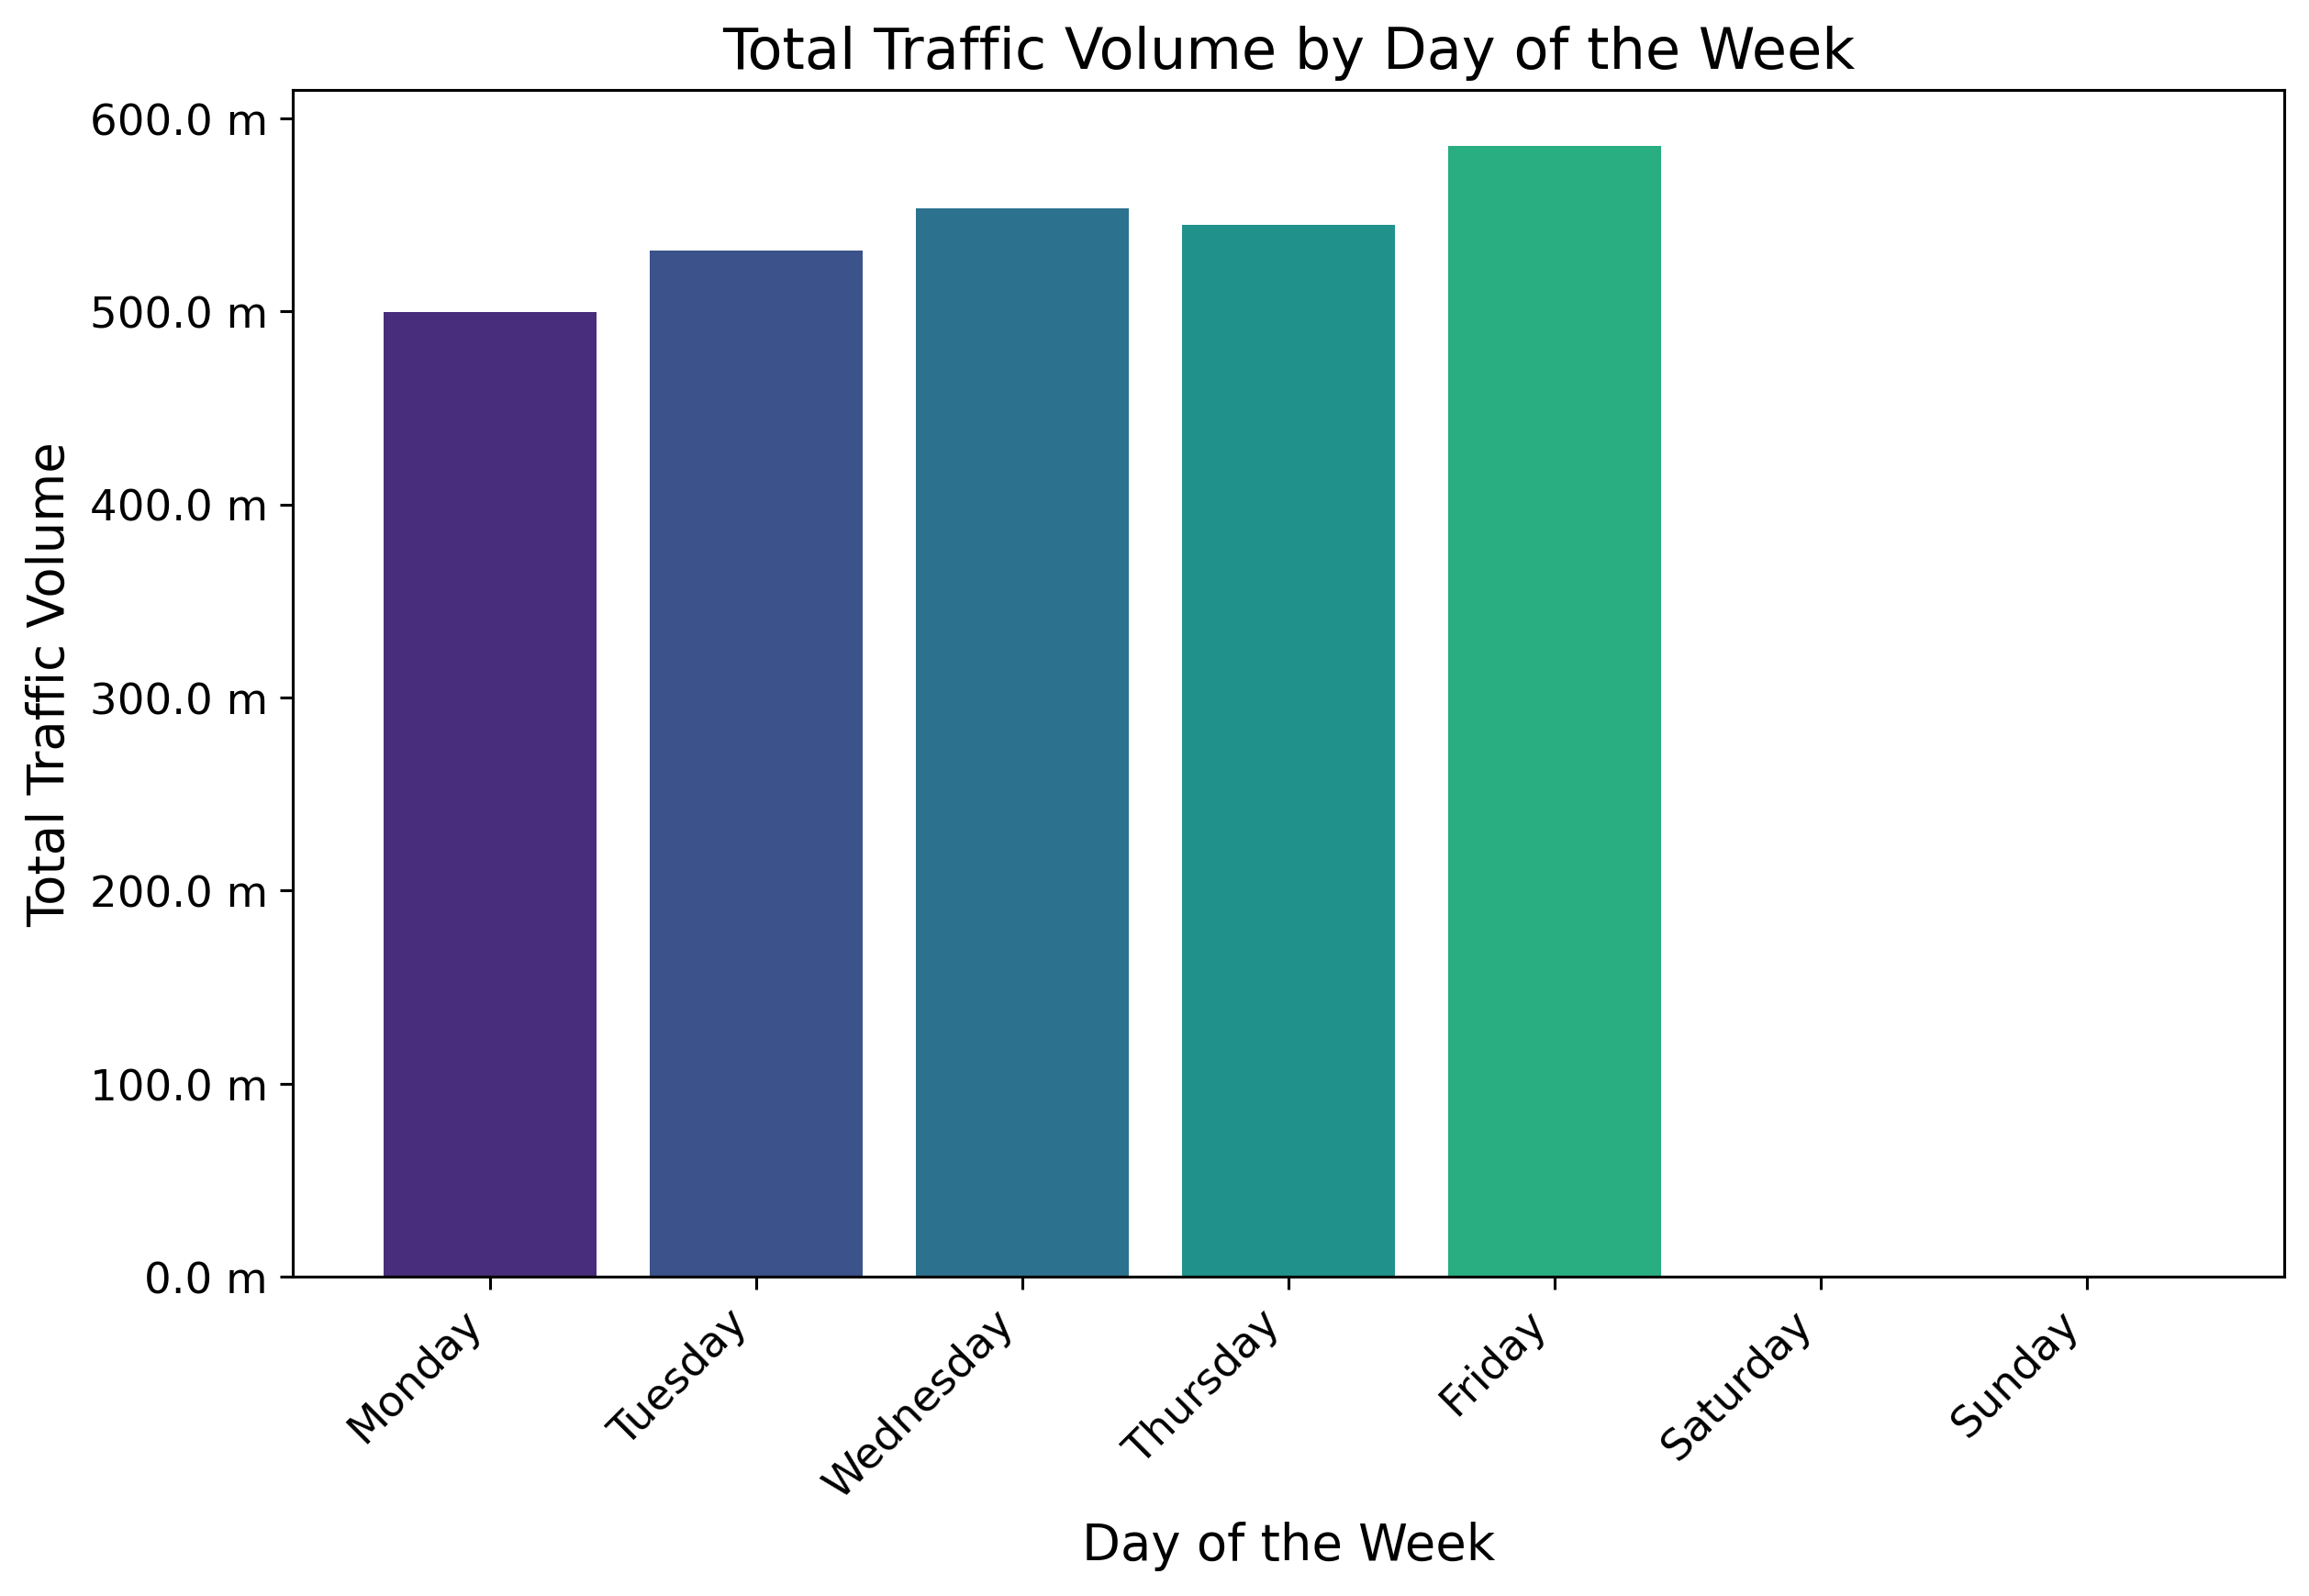

In [109]:

# Sort the days of the week in the correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sum['Day_of_Week'] = pd.Categorical(daily_sum['Day_of_Week'], categories=day_order, ordered=True)
daily_sum = daily_sum.sort_values('Day_of_Week')

# Generate a bar plot with better organization
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(daily_sum.Day_of_Week, daily_sum.all_motor_vehicles, color=sns.color_palette("viridis", len(day_order)))

# Format the y-axis to display large numbers more cleanly
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(format_number))

# # Add annotations to each bar
# for bar in bars:
#     height = bar.get_height()
#     ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # 3 points vertical offset
#                 textcoords="offset points", ha='center', va='bottom', fontsize=12)

# Set labels and title with larger font size
ax.set_ylabel('Total Traffic Volume', fontsize=14)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_title('Total Traffic Volume by Day of the Week', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()



**Notes~**

- The above picture describes the hourly traffic average per day and Friday has the highest total traffic volume. Saturday and Sunda have the lowest traffic volumes.

In [ ]:
pd_raw_count_cleaned.local_authority_name.unique()

array(['Isles of Scilly', 'Nottinghamshire', 'North Lanarkshire',
       'Somerset', 'Newport', 'Bridgend', 'Swansea', 'Isle of Anglesey',
       'Gwynedd', 'Conwy', 'Denbighshire', 'Monmouthshire', 'Powys',
       'Carmarthenshire', 'Pembrokeshire', 'Neath Port Talbot',
       'The Vale of Glamorgan', 'Cardiff', 'Flintshire', 'Merthyr Tydfil',
       'Rhondda, Cynon, Taff', 'Ceredigion', 'Blaenau Gwent', 'Torfaen',
       'Wrexham', 'West Lothian', 'Renfrewshire', 'City of Edinburgh',
       'Falkirk', 'Perth & Kinross', 'Fife', 'Scottish Borders',
       'East Lothian', 'Highland', 'Midlothian', 'South Lanarkshire',
       'Dumfries & Galloway', 'East Ayrshire', 'South Ayrshire',
       'North Ayrshire', 'Stirling', 'West Dunbartonshire',
       'Argyll & Bute', 'Aberdeenshire', 'Moray', 'Dundee City',
       'Glasgow City', 'Inverclyde', 'East Dunbartonshire',
       'Clackmannanshire', 'Aberdeen City', 'Angus',
       'Comhairle nan Eilean Siar', 'Orkney Islands', 'Shetland Islands

In [18]:
total_traffic_count_per_city = pd_raw_count_cleaned.groupby(['local_authority_name', "hour"]).aggregate({'all_motor_vehicles': 'sum'}).reset_index()

In [19]:
total_traffic_count_per_city

local_authority_name  hour  all_motor_vehicles
0           Aberdeen City     7            364225.0
1           Aberdeen City     8            378493.0
2           Aberdeen City     9            295651.0
3           Aberdeen City    10            269095.0
4           Aberdeen City    11            279082.0
...                   ...   ...                 ...
2556                 York    14            543381.0
2557                 York    15            598518.0
2558                 York    16            683468.0
2559                 York    17            720696.0
2560                 York    18            552150.0

[2561 rows x 3 columns]

In [21]:
total_traffic_count_per_city.sort_values

<bound method DataFrame.sort_values of      local_authority_name  hour  all_motor_vehicles
0           Aberdeen City     7            364225.0
1           Aberdeen City     8            378493.0
2           Aberdeen City     9            295651.0
3           Aberdeen City    10            269095.0
4           Aberdeen City    11            279082.0
...                   ...   ...                 ...
2556                 York    14            543381.0
2557                 York    15            598518.0
2558                 York    16            683468.0
2559                 York    17            720696.0
2560                 York    18            552150.0

[2561 rows x 3 columns]>

In [22]:
total_traffic_count_per_city

local_authority_name  hour  all_motor_vehicles
0           Aberdeen City     7            364225.0
1           Aberdeen City     8            378493.0
2           Aberdeen City     9            295651.0
3           Aberdeen City    10            269095.0
4           Aberdeen City    11            279082.0
...                   ...   ...                 ...
2556                 York    14            543381.0
2557                 York    15            598518.0
2558                 York    16            683468.0
2559                 York    17            720696.0
2560                 York    18            552150.0

[2561 rows x 3 columns]

In [24]:
total_traffic_count_per_city = total_traffic_count_per_city.groupby(["local_authority_name"]).agg({"all_motor_vehicles": "sum"}).reset_index()

In [25]:
total_traffic_count_per_city.head().sort_values(total_traffic_count_per_city.columns[0], ascending=False)

local_authority_name  all_motor_vehicles
4  Barking and Dagenham           6024345.0
3         Argyll & Bute            781077.0
2                 Angus           1400502.0
1         Aberdeenshire           3130869.0
0         Aberdeen City           3960831.0

In [ ]:
total_traffic_count_per_city = total_traffic_count_per_city.groupby("local_authority_name").agg({"all_motor_vehicles": "sum"})\
    .sort_values(by="all_motor_vehicles", ascending=False)\
    .reset_index()

### Geo visualization 

The shape files by counties were downloaded from the [UK Statistic Authority Website](https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-counties)

In [111]:
import geopandas as gpd

In [112]:
uk_shape_files_by_counties = "../data/uk_shapefiles_by_counties/infuse_cnty_lyr_2011_clipped.shp"
uk_map  = gpd.read_file(uk_shape_files_by_counties)

In [113]:
uk_map.head()

geo_label   geo_code  \
0  Worcestershire  E10000034   
1  Cambridgeshire  E10000003   
2          Surrey  E10000030   
3   Hertfordshire  E10000015   
4   West Midlands  E11000005   

                                            geometry  
0  POLYGON ((388956.762 280597.560, 388956.558 28...  
1  MULTIPOLYGON (((544771.686 281972.691, 544689....  
2  POLYGON ((510169.788 171375.608, 510186.456 17...  
3  POLYGON ((522475.130 235675.561, 522511.595 23...  
4  POLYGON ((434069.000 283791.211, 434071.000 28...

In [ ]:
uk_map.geometry = uk_map.geometry.scale(xfact=1/1e4, yfact=1/1e4, zfact=1.0, origin=(0, 0))

In [ ]:
uk_map

geo_label   geo_code  \
0       Worcestershire  E10000034   
1       Cambridgeshire  E10000003   
2               Surrey  E10000030   
3        Hertfordshire  E10000015   
4        West Midlands  E11000005   
5   Greater Manchester  E11000001   
6     Northamptonshire  E10000021   
7      Buckinghamshire  E10000002   
8           Merseyside  E11000002   
9              Suffolk  E10000029   
10         East Sussex  E10000011   
11            Somerset  E10000027   
12                Kent  E10000016   
13       Tyne and Wear  E11000004   
14         Oxfordshire  E10000025   
15     South Yorkshire  E11000003   
16     North Yorkshire  E10000023   
17             Norfolk  E10000020   
18      Leicestershire  E10000018   
19          Derbyshire  E10000007   
20        Lincolnshire  E10000019   
21         West Sussex  E10000032   
22               Devon  E10000008   
23        Outer London  E13000002   
24        Inner London  E13000001   
25     Gloucestershire  E10000013   
26             Cumbria  E10000006   
27          Lancashire  E10000017   
28              Dorset  E10000009   
29       Staffordshire  E10000028   
30     Nottinghamshire  E10000024   
31               Essex  E10000012   
32      West Yorkshire  E11000006   
33           Hampshire  E10000014   
34        Warwickshire  E10000031   

                                             geometry  
0   POLYGON ((38.896 28.060, 38.896 28.060, 38.895...  
1   MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ...  
2   POLYGON ((51.017 17.138, 51.019 17.137, 51.019...  
3   POLYGON ((52.248 23.568, 52.251 23.573, 52.253...  
4   POLYGON ((43.407 28.379, 43.407 28.379, 43.407...  
5   POLYGON ((39.256 41.941, 39.259 41.941, 39.259...  
6   POLYGON ((49.334 29.884, 49.336 29.884, 49.336...  
7   POLYGON ((48.843 23.182, 48.843 23.182, 48.843...  
8   MULTIPOLYGON (((34.536 39.904, 34.535 39.905, ...  
9   MULTIPOLYGON (((63.920 24.811, 63.920 24.811, ...  
10  MULTIPOLYGON (((55.918 13.734, 55.921 13.733, ...  
11  MULTIPOLYGON (((33.132 15.739, 33.131 15.737, ...  
12  MULTIPOLYGON (((62.988 16.995, 62.989 16.995, ...  
13  MULTIPOLYGON (((43.041 56.552, 43.041 56.552, ...  
14  POLYGON ((47.616 18.357, 47.618 18.356, 47.619...  
15  POLYGON ((46.026 41.085, 46.027 41.084, 46.027...  
16  MULTIPOLYGON (((50.555 48.648, 50.562 48.647, ...  
17  MULTIPOLYGON (((62.308 30.887, 62.308 30.887, ...  
18  POLYGON ((47.448 33.305, 47.450 33.306, 47.450...  
19  POLYGON ((44.405 38.005, 44.406 38.005, 44.406...  
20  MULTIPOLYGON (((53.633 40.306, 53.633 40.306, ...  
21  MULTIPOLYGON (((52.870 14.167, 52.870 14.167, ...  
22  MULTIPOLYGON (((29.866 12.616, 29.865 12.621, ...  
23  MULTIPOLYGON (((53.453 20.006, 53.453 20.006, ...  
24  MULTIPOLYGON (((53.542 18.697, 53.542 18.697, ...  
25  POLYGON ((42.378 22.883, 42.378 22.883, 42.378...  
26  MULTIPOLYGON (((33.598 56.078, 33.598 56.079, ...  
27  MULTIPOLYGON (((35.417 42.866, 35.415 42.866, ...  
28  MULTIPOLYGON (((40.025 8.537, 40.025 8.537, 40...  
29  POLYGON ((40.930 29.925, 40.930 29.924, 40.930...  
30  MULTIPOLYGON (((46.309 39.257, 46.314 39.259, ...  
31  MULTIPOLYGON (((58.405 19.554, 58.405 19.554, ...  
32  POLYGON ((42.554 44.560, 42.557 44.562, 42.559...  
33  MULTIPOLYGON (((48.361 16.095, 48.361 16.095, ...  
34  POLYGON ((43.284 28.442, 43.284 28.442, 43.283...

In [ ]:
uk_map.head(2)

geo_label   geo_code  \
0  Worcestershire  E10000034   
1  Cambridgeshire  E10000003   

                                            geometry  
0  POLYGON ((38.896 28.060, 38.896 28.060, 38.895...  
1  MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ...

Renaming the columns to make sure we have the same column name accross all the datasets.

In [ ]:
uk_map = uk_map.rename({"geo_label": "local_authority_name", }, axis="columns")

In [ ]:
uk_map.head()

local_authority_name   geo_code  \
0       Worcestershire  E10000034   
1       Cambridgeshire  E10000003   
2               Surrey  E10000030   
3        Hertfordshire  E10000015   
4        West Midlands  E11000005   

                                            geometry  
0  POLYGON ((38.896 28.060, 38.896 28.060, 38.895...  
1  MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ...  
2  POLYGON ((51.017 17.138, 51.019 17.137, 51.019...  
3  POLYGON ((52.248 23.568, 52.251 23.573, 52.253...  
4  POLYGON ((43.407 28.379, 43.407 28.379, 43.407...

In [ ]:
total_traffic_count_per_city.local_authority_name.unique()

array(['Hertfordshire', 'Essex', 'Cambridgeshire', 'Norfolk', 'Suffolk',
       'Thurrock', 'Peterborough', 'Bedfordshire', 'Central Bedfordshire',
       'Bedford', 'Southend-on-Sea', 'Luton'], dtype=object)

In [121]:
uk_map.head()

geo_label   geo_code  \
0  Worcestershire  E10000034   
1  Cambridgeshire  E10000003   
2          Surrey  E10000030   
3   Hertfordshire  E10000015   
4   West Midlands  E11000005   

                                            geometry  
0  POLYGON ((388956.762 280597.560, 388956.558 28...  
1  MULTIPOLYGON (((544771.686 281972.691, 544689....  
2  POLYGON ((510169.788 171375.608, 510186.456 17...  
3  POLYGON ((522475.130 235675.561, 522511.595 23...  
4  POLYGON ((434069.000 283791.211, 434071.000 28...

In [ ]:
total_traffic_count_per_city

local_authority_name  all_motor_vehicles
0          Hertfordshire            7.589068
1                  Essex            7.542268
2         Cambridgeshire            3.291896
3                Norfolk            2.480293
4                Suffolk            2.312061
5               Thurrock            1.428971
6           Peterborough            1.293087
7           Bedfordshire            0.885658
8   Central Bedfordshire            0.852805
9                Bedford            0.424023
10       Southend-on-Sea            0.418691
11                 Luton            0.389928

In [ ]:
essex_map = uk_map.loc[uk_map.local_authority_name.str.lower().isin(total_traffic_count_per_city.local_authority_name.str.lower().values)]

In [ ]:
essex_map

local_authority_name   geo_code  \
1        Cambridgeshire  E10000003   
3         Hertfordshire  E10000015   
9               Suffolk  E10000029   
17              Norfolk  E10000020   
31                Essex  E10000012   

                                             geometry  
1   MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ...  
3   POLYGON ((52.248 23.568, 52.251 23.573, 52.253...  
9   MULTIPOLYGON (((63.920 24.811, 63.920 24.811, ...  
17  MULTIPOLYGON (((62.308 30.887, 62.308 30.887, ...  
31  MULTIPOLYGON (((58.405 19.554, 58.405 19.554, ...

In [ ]:
essex_data_with_counts = essex_map.merge(total_traffic_count_per_city).loc[:, ["local_authority_name", "all_motor_vehicles", "geometry"]]

In [ ]:
essex_data_with_counts.head()

local_authority_name  all_motor_vehicles  \
0       Cambridgeshire            3.291896   
1        Hertfordshire            7.589068   
2              Suffolk            2.312061   
3              Norfolk            2.480293   
4                Essex            7.542268   

                                            geometry  
0  MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ...  
1  POLYGON ((52.248 23.568, 52.251 23.573, 52.253...  
2  MULTIPOLYGON (((63.920 24.811, 63.920 24.811, ...  
3  MULTIPOLYGON (((62.308 30.887, 62.308 30.887, ...  
4  MULTIPOLYGON (((58.405 19.554, 58.405 19.554, ...

0    Annotation(53.8647, 27.3205, 'Cambridgeshire')
1     Annotation(52.2937, 21.6063, 'Hertfordshire')
2           Annotation(60.9021, 26.2487, 'Suffolk')
3           Annotation(59.9855, 31.2221, 'Norfolk')
4             Annotation(57.6606, 21.5636, 'Essex')
dtype: object

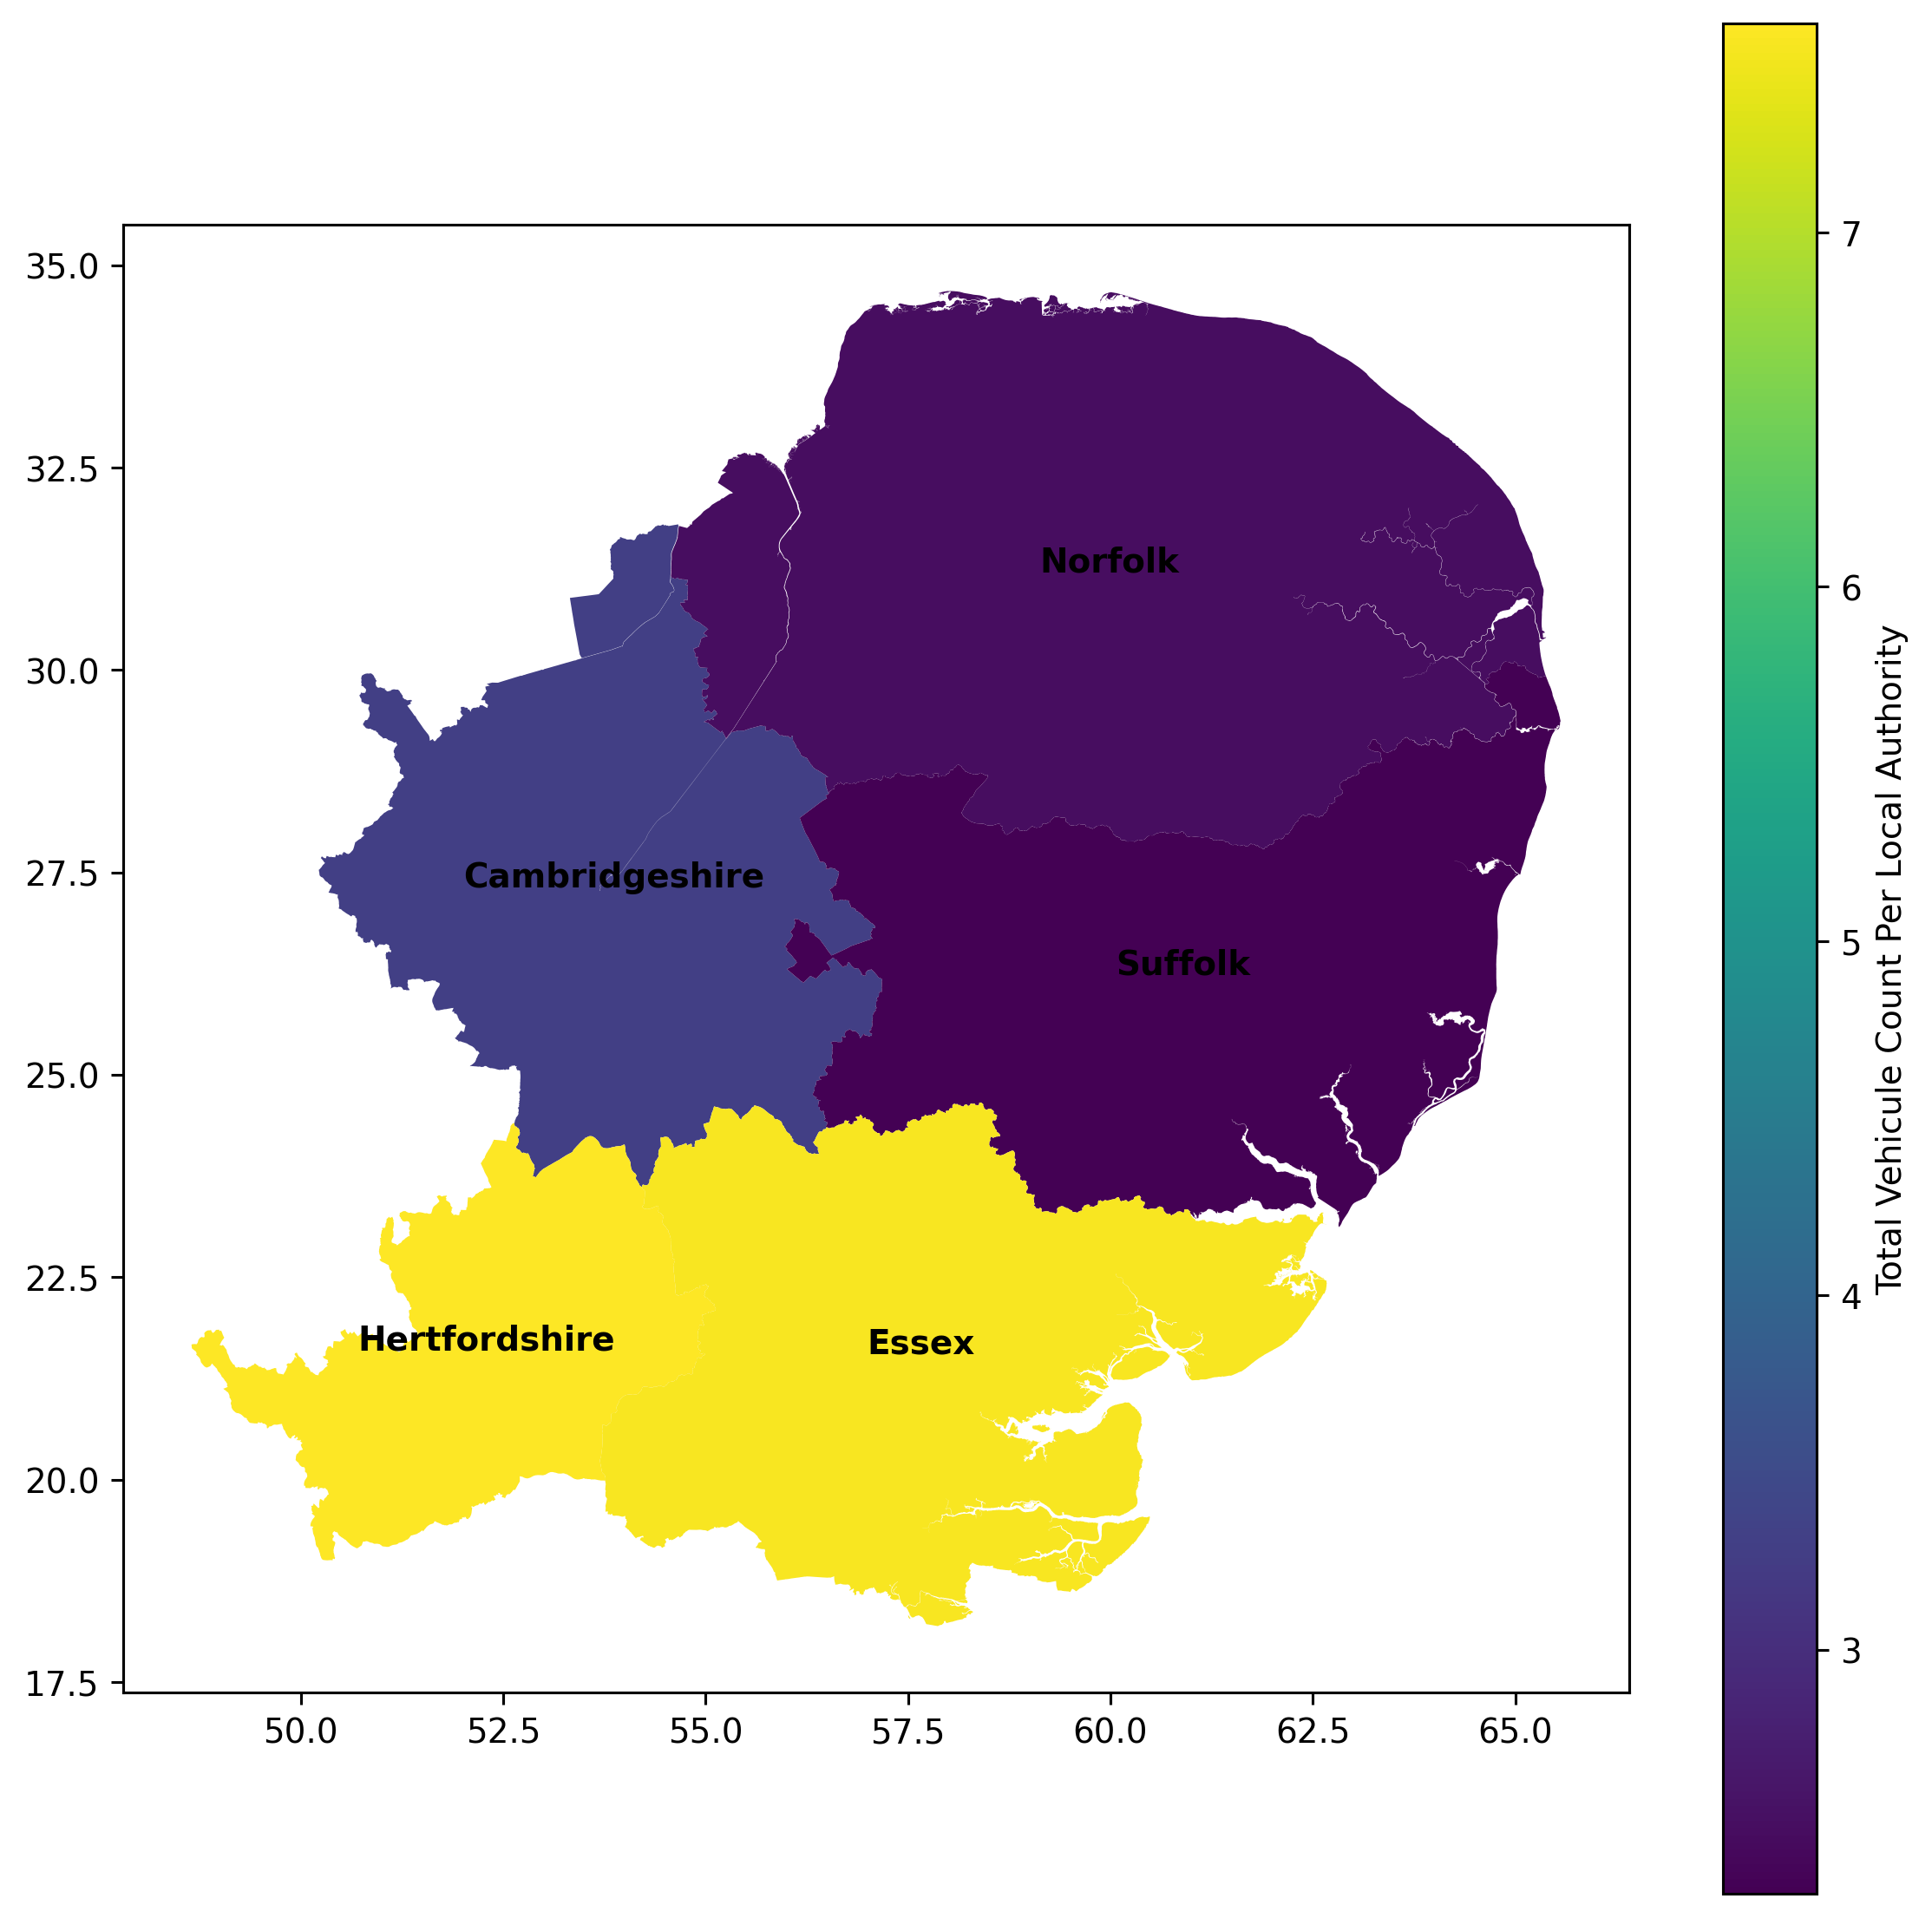

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
essex_data_with_counts.plot(
    column="all_motor_vehicles",
    legend=True,
    legend_kwds={"label": "Total Vehicule Count Per Local Authority"},
    ax=ax,
);
essex_data_with_counts.apply(lambda x: ax.annotate(text=x.local_authority_name, xy=x.geometry.centroid.coords[0], xytext=(0,0), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis="columns")

The picture above try to plot the traffic volume for each region on the Essex map. This image show us the region with the higgest traffic volumes are the region in the south  of East Anglia. Those regions are closer to London. The Region with the lowest traffic are the Sufflok and Norflk areas. This is due tho the fact that the Sufflok and Norflk areas are further from London.

#### Analysis of the missing region



In [ ]:
missing_regions = total_traffic_count_per_city.loc[~total_traffic_count_per_city.local_authority_name.isin(essex_map.local_authority_name)]

In [ ]:
missing_regions

local_authority_name  all_motor_vehicles
5               Thurrock            1.428971
6           Peterborough            1.293087
7           Bedfordshire            0.885658
8   Central Bedfordshire            0.852805
9                Bedford            0.424023
10       Southend-on-Sea            0.418691
11                 Luton            0.389928

### Identify Outliers and Data Distribution

In [ ]:
# List of numerical columns based on the info you provided
numerical_columns = [
    'count_point_id', 'year', 'region_id', 'local_authority_id', 
    'easting', 'northing', 'latitude', 'longitude', 
    'pedal_cycles', 'two_wheeled_motor_vehicles'
]

# Generate boxplots for each numerical column
# for column in numerical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(y=pd_raw_count_cleaned[column])
#     plt.title(f'Boxplot of {column} (Raw Count Data)')
#     plt.ylabel(column)
#     plt.show()
